<a href="https://colab.research.google.com/github/Abrx1921/Data-Science-Portfolio/blob/main/Project_2_Housing_AbrahamSS_v00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction

## By: Abraham Saenz Sigala
## Date: 10/09/2025

In [1]:
# Import initial libraries for data cleaning, manipulation, and exploration.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in the dataset
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
url


'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'

In [3]:
# Read in the csv from our link
data = pd.read_csv(url)


In [4]:
# Ensure it loaded in correctly
data


PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0     905101070           20        RL          62.0     14299   Pave   NaN   
1     905101330           90        RL          72.0     10791   Pave   NaN   
2     903454090           50        RM          50.0      9000   Pave   NaN   
3     533244030           60        FV          68.0      7379   Pave   NaN   
4     909252020           70        RL          60.0      7200   Pave   NaN   
...         ...          ...       ...           ...       ...    ...   ...   
2632  903231070           50        RM          52.0      6240   Pave   NaN   
2633  906201021           80        RL          74.0     10778   Pave   NaN   
2634  533253070          120        RL          61.0      3782   Pave   NaN   
2635  527376100           20        RL          78.0     10140   Pave   NaN   
2636  528292060           60        RL          41.0     12460   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
0          Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
1          Reg          Lvl    AllPub  ...         0     NaN    NaN   
2          Reg          Bnk    AllPub  ...         0     NaN    NaN   
3          IR1          Lvl    AllPub  ...         0     NaN    NaN   
4          Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
...        ...          ...       ...  ...       ...     ...    ...   
2632       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2633       IR1          Lvl    AllPub  ...         0     NaN    NaN   
2634       IR1          Lvl    AllPub  ...         0     NaN    NaN   
2635       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2636       IR1          Lvl    AllPub  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0             NaN        0       7    2007        WD           Normal   
1            Shed      500      10    2006        WD           Normal   
2             NaN        0      12    2007        WD           Normal   
3             NaN        0       4    2010        WD           Normal   
4             NaN        0       4    2009        WD           Normal   
...           ...      ...     ...     ...        ...             ...   
2632         Shed      400       9    2006        WD           Normal   
2633          NaN        0       7    2009        WD           Normal   
2634          NaN        0       9    2009        WD           Normal   
2635          NaN        0       8    2009        WD           Normal   
2636          NaN        0       5    2008        WD           Normal   

      SalePrice  
0        115400  
1         90000  
2        141000  
3        254000  
4        155000  
...         ...  
2632     114500  
2633     162000  
2634     211500  
2635     165000  
2636     225000  

[2637 rows x 81 columns]

## Problem Definition


What we are  essentially trying to do is build a model that will allow us to predict the price of houses given historical sale price data.

Supervised Learning Problem: We have a target variable (SalePrice).

Regression: Our sale target variable is Numerical & Continous.

## Data Collection/Sources


Data Source:

The data is available on AWS S3 at: https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv

A data dictionary file is available at AWS S3 at: https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf

In [5]:
# Intital Data Exploration
data.sample(5)

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1398  906382060           20        RL          73.0      8760   Pave   NaN   
1514  527425060           20        RL          70.0     10500   Pave   NaN   
701   528456220           60        FV          75.0      9000   Pave   NaN   
238   528480150           60        FV          65.0      8125   Pave   NaN   
1063  907201220           20        RL           NaN     16269   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
1398       Reg          Lvl    AllPub  ...         0     NaN    NaN   
1514       Reg          Lvl    AllPub  ...         0     NaN    NaN   
701        Reg          Lvl    AllPub  ...         0     NaN    NaN   
238        Reg          Lvl    AllPub  ...         0     NaN    NaN   
1063       IR1          Lvl    AllPub  ...         0     NaN  MnPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
1398          NaN        0       6    2007        WD           Normal   
1514          NaN        0       3    2009        WD          Abnorml   
701           NaN        0       6    2009        WD           Normal   
238           NaN        0       8    2006        New         Partial   
1063          NaN        0       7    2009        WD           Normal   

      SalePrice  
1398     212999  
1514      97000  
701      210000  
238      197000  
1063     140000  

[5 rows x 81 columns]

In [6]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [7]:
# of rows/columns
data.shape

(2637, 81)

In [8]:
# Column names
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [9]:
# Summary stats
data.describe().transpose()

count          mean           std          min  \
PID              2637.0  7.141301e+08  1.887527e+08  526301100.0   
MS SubClass      2637.0  5.734926e+01  4.249909e+01         20.0   
Lot Frontage     2188.0  6.916682e+01  2.335678e+01         21.0   
Lot Area         2637.0  1.004469e+04  6.742550e+03       1300.0   
Overall Qual     2637.0  6.097459e+00  1.411522e+00          1.0   
Overall Cond     2637.0  5.569966e+00  1.118262e+00          1.0   
Year Built       2637.0  1.971289e+03  3.030699e+01       1872.0   
Year Remod/Add   2637.0  1.984203e+03  2.091308e+01       1950.0   
Mas Vnr Area     2614.0  1.018879e+02  1.795782e+02          0.0   
BsmtFin SF 1     2636.0  4.384412e+02  4.496023e+02          0.0   
BsmtFin SF 2     2636.0  5.106866e+01  1.725218e+02          0.0   
Bsmt Unf SF      2636.0  5.556692e+02  4.362232e+02          0.0   
Total Bsmt SF    2636.0  1.045179e+03  4.296861e+02          0.0   
1st Flr SF       2637.0  1.155506e+03  3.825975e+02        334.0   
2nd Flr SF       2637.0  3.370049e+02  4.277422e+02          0.0   
Low Qual Fin SF  2637.0  4.474403e+00  4.502251e+01          0.0   
Gr Liv Area      2637.0  1.496985e+03  4.952096e+02        334.0   
Bsmt Full Bath   2635.0  4.322581e-01  5.252392e-01          0.0   
Bsmt Half Bath   2635.0  5.882353e-02  2.401296e-01          0.0   
Full Bath        2637.0  1.559727e+00  5.501562e-01          0.0   
Half Bath        2637.0  3.852863e-01  5.036095e-01          0.0   
Bedroom AbvGr    2637.0  2.857793e+00  8.202835e-01          0.0   
Kitchen AbvGr    2637.0  1.044369e+00  2.131924e-01          0.0   
TotRms AbvGrd    2637.0  6.446720e+00  1.568342e+00          2.0   
Fireplaces       2637.0  5.991657e-01  6.510521e-01          0.0   
Garage Yr Blt    2490.0  1.978186e+03  2.545265e+01       1895.0   
Garage Cars      2636.0  1.763278e+00  7.605764e-01          0.0   
Garage Area      2636.0  4.709681e+02  2.128169e+02          0.0   
Wood Deck SF     2637.0  9.430527e+01  1.269273e+02          0.0   
Open Porch SF    2637.0  4.698445e+01  6.656433e+01          0.0   
Enclosed Porch   2637.0  2.281342e+01  6.117764e+01          0.0   
3Ssn Porch       2637.0  2.368601e+00  2.316060e+01          0.0   
Screen Porch     2637.0  1.577512e+01  5.578375e+01          0.0   
Pool Area        2637.0  2.130072e+00  3.514014e+01          0.0   
Misc Val         2637.0  4.201403e+01  3.931588e+02          0.0   
Mo Sold          2637.0  6.243838e+00  2.722093e+00          1.0   
Yr Sold          2637.0  2.007796e+03  1.306403e+00       2006.0   
SalePrice        2637.0  1.799862e+05  7.830925e+04      12789.0   

                          25%          50%           75%           max  
PID              5.284770e+08  535453040.0  9.071870e+08  1.007100e+09  
MS SubClass      2.000000e+01         50.0  7.000000e+01  1.900000e+02  
Lot Frontage     5.800000e+01         68.0  8.000000e+01  3.130000e+02  
Lot Area         7.436000e+03       9450.0  1.152600e+04  1.646600e+05  
Overall Qual     5.000000e+00          6.0  7.000000e+00  1.000000e+01  
Overall Cond     5.000000e+00          5.0  6.000000e+00  9.000000e+00  
Year Built       1.954000e+03       1973.0  2.001000e+03  2.010000e+03  
Year Remod/Add   1.965000e+03       1993.0  2.004000e+03  2.010000e+03  
Mas Vnr Area     0.000000e+00          0.0  1.640000e+02  1.600000e+03  
BsmtFin SF 1     0.000000e+00        368.0  7.320000e+02  5.644000e+03  
BsmtFin SF 2     0.000000e+00          0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF      2.180000e+02        464.5  7.972500e+02  2.336000e+03  
Total Bsmt SF    7.920000e+02        988.0  1.290250e+03  6.110000e+03  
1st Flr SF       8.780000e+02       1082.0  1.380000e+03  4.692000e+03  
2nd Flr SF       0.000000e+00          0.0  7.080000e+02  2.065000e+03  
Low Qual Fin SF  0.000000e+00          0.0  0.000000e+00  1.064000e+03  
Gr Liv Area      1.128000e+03       1441.0  1.740000e+03  5.642000e+03  
Bsmt Full Bath   0.000000e+00          0.0  1.00000

In [10]:
# Creating a mask so I can view the columns with null values
nullmask = data.isna().sum()
nullmask

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      449
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [11]:
# Filtering columns with null values > 1
nullmask = nullmask[nullmask > 0].sort_values(ascending = False)
nullmask

Pool QC           2626
Misc Feature      2541
Alley             2457
Fence             2109
Mas Vnr Type      1607
Fireplace Qu      1284
Lot Frontage       449
Garage Cond        147
Garage Yr Blt      147
Garage Finish      147
Garage Qual        147
Garage Type        145
Bsmt Exposure       76
BsmtFin Type 2      74
Bsmt Qual           73
BsmtFin Type 1      73
Bsmt Cond           73
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
Garage Cars          1
dtype: int64

In [12]:
# Find the % of missing values in columns
nullpercent = ((nullmask / data.shape[0]) * 100).round(2).sort_values(ascending = False)
nullpercent

Pool QC           99.58
Misc Feature      96.36
Alley             93.17
Fence             79.98
Mas Vnr Type      60.94
Fireplace Qu      48.69
Lot Frontage      17.03
Garage Cond        5.57
Garage Yr Blt      5.57
Garage Finish      5.57
Garage Qual        5.57
Garage Type        5.50
Bsmt Exposure      2.88
BsmtFin Type 2     2.81
Bsmt Qual          2.77
BsmtFin Type 1     2.77
Bsmt Cond          2.77
Mas Vnr Area       0.87
Bsmt Half Bath     0.08
Bsmt Full Bath     0.08
BsmtFin SF 1       0.04
Total Bsmt SF      0.04
Bsmt Unf SF        0.04
BsmtFin SF 2       0.04
Garage Area        0.04
Garage Cars        0.04
dtype: float64

In [13]:
# Creating a mask so I can view the rows with null values
rnullmask = data.isna().sum(axis = 1)
rnullmask

0        5
1       10
2        5
3        5
4        5
        ..
2632     3
2633     6
2634     5
2635     3
2636     5
Length: 2637, dtype: int64

In [14]:
# Filtering rows with null values > 1
rnullmask = rnullmask[rnullmask > 1].sort_values(ascending = False)
rnullmask

526     16
2376    16
847     16
1525    16
1588    16
        ..
1194     2
1323     2
1442     2
1329     2
1497     2
Length: 2636, dtype: int64

In [15]:
# Find the % of missing values in columns
rnullpercent = ((rnullmask / data.shape[1]) * 100).round(2).sort_values(ascending = False)
rnullpercent

526     19.75
1588    19.75
847     19.75
1143    19.75
421     19.75
        ...  
1194     2.47
2523     2.47
1323     2.47
1329     2.47
1497     2.47
Length: 2636, dtype: float64

In [16]:
# Identify if there are any null values in our target variable
data["SalePrice"].isna().sum()


np.int64(0)

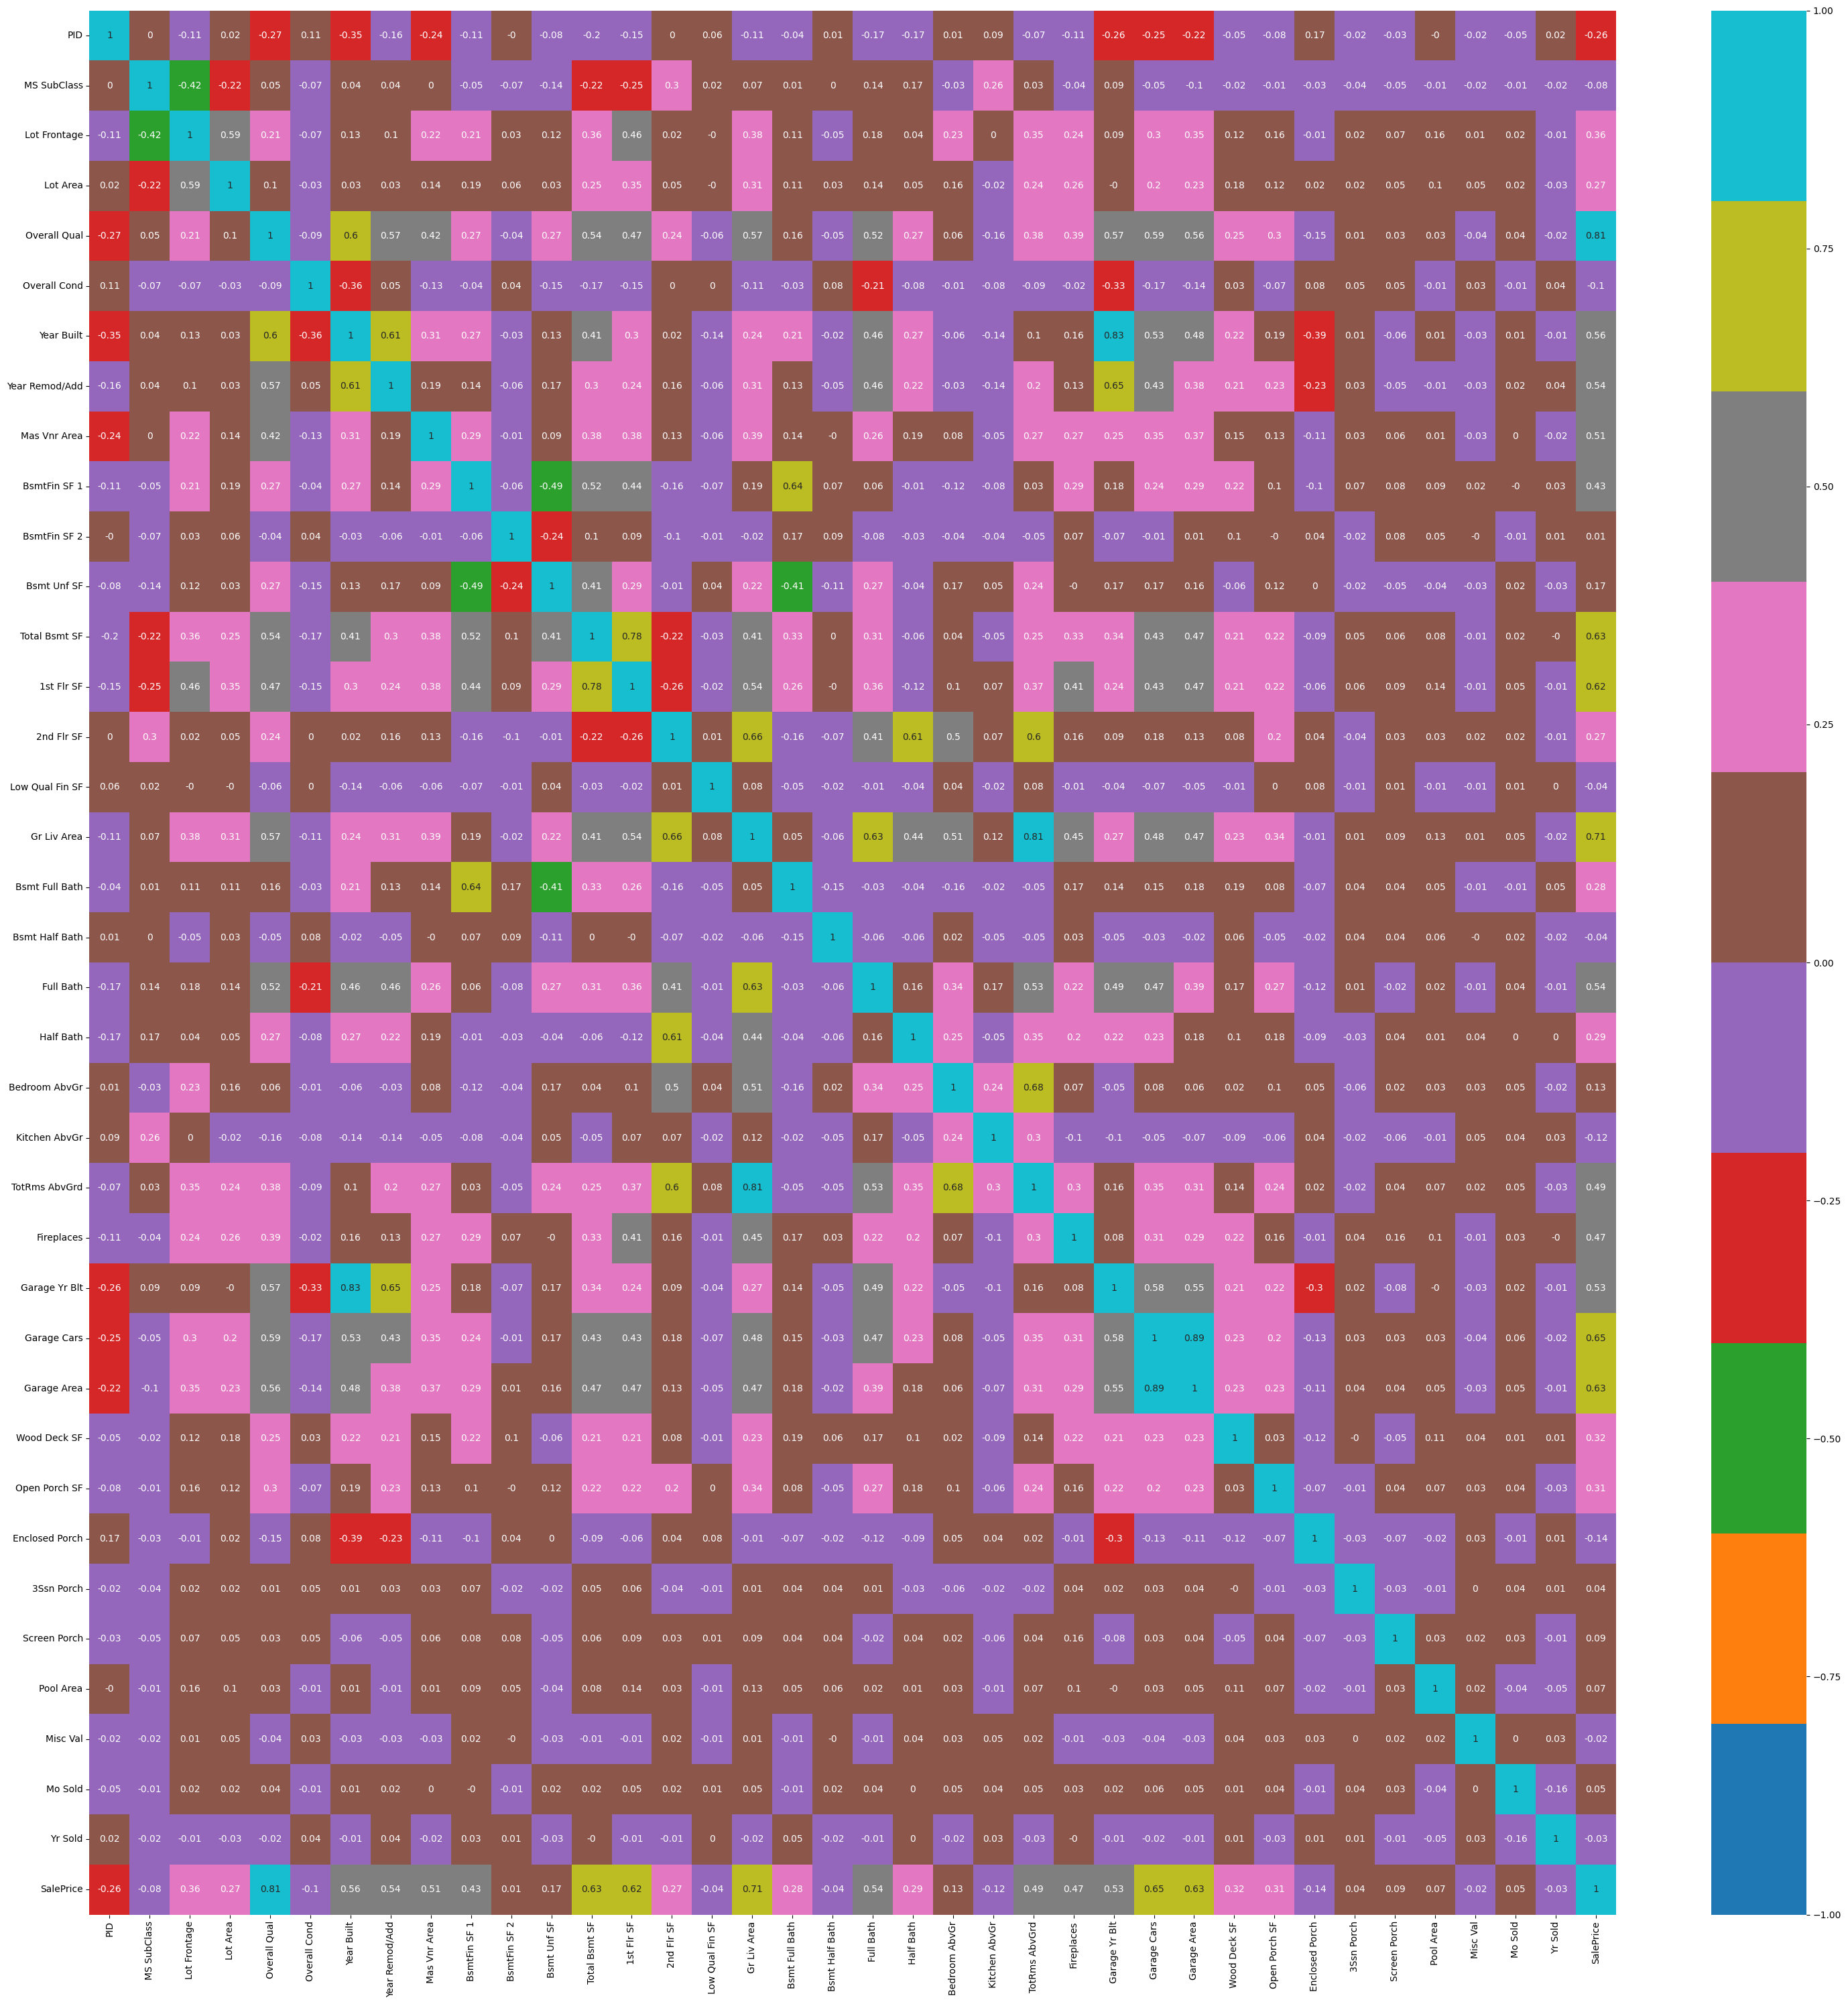

In [17]:
# Identifity non independent features and features correlated with target
plt.figure(figsize = (30, 30))
sns.heatmap(data.corr(numeric_only = True).round(2), vmin = -1, vmax = 1, cmap = 'tab10', annot = True)
plt.tight_layout()
plt.show()

In [18]:
# Filter for correlation above a threshold
threshold = .7


In [19]:
# Creating correlation
corr = data.corr(numeric_only=True)
corr.sample(5)

PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
MS SubClass   0.003801     1.000000     -0.421410 -0.220406      0.046362   
Garage Cars  -0.247019    -0.047860      0.301058  0.201440      0.593861   
Wood Deck SF -0.046697    -0.016255      0.119160  0.180943      0.245627   
BsmtFin SF 2 -0.000439    -0.072879      0.034431  0.055292     -0.039208   
Garage Area  -0.220347    -0.102449      0.351721  0.230140      0.558273   

              Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
MS SubClass      -0.069494    0.036241        0.042770      0.000571   
Garage Cars      -0.167497    0.529792        0.426257      0.354833   
Wood Deck SF      0.030796    0.220759        0.210448      0.152719   
BsmtFin SF 2      0.043001   -0.026485       -0.056571     -0.013610   
Garage Area      -0.141805    0.476829        0.376855      0.366407   

              BsmtFin SF 1  ...  Wood Deck SF  Open Porch SF  Enclosed Porch  \
MS SubClass      -0.051380  ...     -0.016255      -0.011079       -0.027317   
Garage Cars       0.244749  ...      0.229863       0.200242       -0.132632   
Wood Deck SF      0.217693  ...      1.000000       0.026865       -0.124161   
BsmtFin SF 2     -0.060983  ...      0.103607      -0.004739        0.038292   
Garage Area       0.292398  ...      0.225508       0.227883       -0.108607   

              3Ssn Porch  Screen Porch  Pool Area  Misc Val   Mo Sold  \
MS SubClass    -0.035452     -0.048090  -0.005281 -0.016237 -0.006331   
Garage Cars     0.029587      0.033255   0.031328 -0.037201  0.055165   
Wood Deck SF   -0.000241     -0.046944   0.112868  0.041788  0.011790   
BsmtFin SF 2   -0.022012      0.075109   0.045609 -0.001558 -0.006285   
Garage Area     0.040118      0.044756   0.051549 -0.026591  0.047760   

               Yr Sold  SalePrice  
MS SubClass  -0.015536  -0.078857  
Garage Cars  -0.021522   0.647223  
Wood Deck SF  0.010937   0.322060  
BsmtFin SF 2  0.007498   0.009329  
Garage Area  -0.011195   0.633900  

[5 rows x 38 columns]

In [20]:
# Drop target variable. Absolute values to find high correlation. Unstack so it looks like a list + sort.
corr_sort = corr.drop(columns = "SalePrice", index = "SalePrice").abs().unstack().sort_values(ascending = False)
corr_sort


Yr Sold        Yr Sold            1.000000
PID            PID                1.000000
Mo Sold        Mo Sold            1.000000
Misc Val       Misc Val           1.000000
Pool Area      Pool Area          1.000000
                                    ...   
Open Porch SF  Low Qual Fin SF    0.000429
Wood Deck SF   3Ssn Porch         0.000241
3Ssn Porch     Wood Deck SF       0.000241
Mo Sold        Misc Val           0.000197
Misc Val       Mo Sold            0.000197
Length: 1369, dtype: float64

In [21]:
# View final correlations above the threshold
corr_sort[(corr_sort > threshold) & (corr_sort < 1)]

Garage Area    Garage Cars      0.892040
Garage Cars    Garage Area      0.892040
Garage Yr Blt  Year Built       0.831714
Year Built     Garage Yr Blt    0.831714
TotRms AbvGrd  Gr Liv Area      0.807065
Gr Liv Area    TotRms AbvGrd    0.807065
1st Flr SF     Total Bsmt SF    0.782696
Total Bsmt SF  1st Flr SF       0.782696
dtype: float64

Our intial data exploration reveals a few things:

- 2637 rows and 81 columns
- 1 id column
- 3 Datatypes: Int64, Float64, Object
- Some columns contain > 50% na values
- Some rows contain < 20% na values
- Target Variable has no missing values!
- Identified correlations among features (threshold > .7)

## Data Cleaning


In [22]:
# Begin by creating a copy of the data
df = data.copy()
df


PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0     905101070           20        RL          62.0     14299   Pave   NaN   
1     905101330           90        RL          72.0     10791   Pave   NaN   
2     903454090           50        RM          50.0      9000   Pave   NaN   
3     533244030           60        FV          68.0      7379   Pave   NaN   
4     909252020           70        RL          60.0      7200   Pave   NaN   
...         ...          ...       ...           ...       ...    ...   ...   
2632  903231070           50        RM          52.0      6240   Pave   NaN   
2633  906201021           80        RL          74.0     10778   Pave   NaN   
2634  533253070          120        RL          61.0      3782   Pave   NaN   
2635  527376100           20        RL          78.0     10140   Pave   NaN   
2636  528292060           60        RL          41.0     12460   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
0          Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
1          Reg          Lvl    AllPub  ...         0     NaN    NaN   
2          Reg          Bnk    AllPub  ...         0     NaN    NaN   
3          IR1          Lvl    AllPub  ...         0     NaN    NaN   
4          Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
...        ...          ...       ...  ...       ...     ...    ...   
2632       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2633       IR1          Lvl    AllPub  ...         0     NaN    NaN   
2634       IR1          Lvl    AllPub  ...         0     NaN    NaN   
2635       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2636       IR1          Lvl    AllPub  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0             NaN        0       7    2007        WD           Normal   
1            Shed      500      10    2006        WD           Normal   
2             NaN        0      12    2007        WD           Normal   
3             NaN        0       4    2010        WD           Normal   
4             NaN        0       4    2009        WD           Normal   
...           ...      ...     ...     ...        ...             ...   
2632         Shed      400       9    2006        WD           Normal   
2633          NaN        0       7    2009        WD           Normal   
2634          NaN        0       9    2009        WD           Normal   
2635          NaN        0       8    2009        WD           Normal   
2636          NaN        0       5    2008        WD           Normal   

      SalePrice  
0        115400  
1         90000  
2        141000  
3        254000  
4        155000  
...         ...  
2632     114500  
2633     162000  
2634     211500  
2635     165000  
2636     225000  

[2637 rows x 81 columns]

In [23]:
# Drop any null values in columns (> 50%)

# Creating a mask so I can view the columns with null values
namask = data.isna().sum()
namask

# Filtering columns with null values > 1
namask = namask[namask > 0].sort_values(ascending = False)
namask

# Find the % of missing values in columns
napercent = ((namask / data.shape[0]) * 100).round(2).sort_values(ascending = False)
napercent


Pool QC           99.58
Misc Feature      96.36
Alley             93.17
Fence             79.98
Mas Vnr Type      60.94
Fireplace Qu      48.69
Lot Frontage      17.03
Garage Cond        5.57
Garage Yr Blt      5.57
Garage Finish      5.57
Garage Qual        5.57
Garage Type        5.50
Bsmt Exposure      2.88
BsmtFin Type 2     2.81
Bsmt Qual          2.77
BsmtFin Type 1     2.77
Bsmt Cond          2.77
Mas Vnr Area       0.87
Bsmt Half Bath     0.08
Bsmt Full Bath     0.08
BsmtFin SF 1       0.04
Total Bsmt SF      0.04
Bsmt Unf SF        0.04
BsmtFin SF 2       0.04
Garage Area        0.04
Garage Cars        0.04
dtype: float64

In [24]:
# Dropping columns
df = df.drop(columns = ["Pool QC", "Misc Feature", "Alley", "Fence", "Mas Vnr Type", "Fireplace Qu"])
df.shape

(2637, 75)

In [25]:
# Dropping identifiers
df = df.drop(columns= ['PID'])

In [26]:
df

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0              20        RL          62.0     14299   Pave       Reg   
1              90        RL          72.0     10791   Pave       Reg   
2              50        RM          50.0      9000   Pave       Reg   
3              60        FV          68.0      7379   Pave       IR1   
4              70        RL          60.0      7200   Pave       Reg   
...           ...       ...           ...       ...    ...       ...   
2632           50        RM          52.0      6240   Pave       Reg   
2633           80        RL          74.0     10778   Pave       IR1   
2634          120        RL          61.0      3782   Pave       IR1   
2635           20        RL          78.0     10140   Pave       Reg   
2636           60        RL          41.0     12460   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope  ... Enclosed Porch  \
0             Lvl    AllPub     Inside        Gtl  ...              0   
1             Lvl    AllPub     Inside        Gtl  ...              0   
2             Bnk    AllPub     Inside        Gtl  ...              0   
3             Lvl    AllPub     Inside        Gtl  ...              0   
4             Lvl    AllPub     Inside        Gtl  ...              0   
...           ...       ...        ...        ...  ...            ...   
2632          Lvl    AllPub     Inside        Gtl  ...              0   
2633          Lvl    AllPub     Inside        Gtl  ...              0   
2634          Lvl    AllPub    CulDSac        Gtl  ...              0   
2635          Lvl    AllPub     Inside        Gtl  ...              0   
2636          Lvl    AllPub        FR2        Gtl  ...              0   

     3Ssn Porch Screen Porch Pool Area Misc Val  Mo Sold  Yr Sold  Sale Type  \
0             0            0         0        0        7     2007        WD    
1             0            0         0      500       10     2006        WD    
2             0          126         0        0       12     2007        WD    
3             0            0         0        0        4     2010        WD    
4             0            0         0        0        4     2009        WD    
...         ...          ...       ...      ...      ...      ...        ...   
2632          0            0         0      400        9     2006        WD    
2633          0            0         0        0        7     2009        WD    
2634          0            0         0        0        9     2009        WD    
2635          0            0         0        0        8     2009        WD    
2636          0            0         0        0        5     2008        WD    

      Sale Condition SalePrice  
0             Normal    115400  
1             Normal     90000  
2             Normal    141000  
3             Normal    254000  
4             Normal    155000  
...              ...       ...  
2632          Normal    114500  
2633          Normal    162000  
2634          Normal    211500  
2635          Normal    165000  
2636          Normal    225000  

[2637 rows x 74 columns]

In [27]:
df.describe().transpose()

count           mean           std      min        25%  \
MS SubClass      2637.0      57.349261     42.499091     20.0      20.00   
Lot Frontage     2188.0      69.166819     23.356779     21.0      58.00   
Lot Area         2637.0   10044.694729   6742.549521   1300.0    7436.00   
Overall Qual     2637.0       6.097459      1.411522      1.0       5.00   
Overall Cond     2637.0       5.569966      1.118262      1.0       5.00   
Year Built       2637.0    1971.288586     30.306986   1872.0    1954.00   
Year Remod/Add   2637.0    1984.202882     20.913077   1950.0    1965.00   
Mas Vnr Area     2614.0     101.887911    179.578232      0.0       0.00   
BsmtFin SF 1     2636.0     438.441199    449.602326      0.0       0.00   
BsmtFin SF 2     2636.0      51.068665    172.521803      0.0       0.00   
Bsmt Unf SF      2636.0     555.669196    436.223188      0.0     218.00   
Total Bsmt SF    2636.0    1045.179059    429.686089      0.0     792.00   
1st Flr SF       2637.0    1155.505878    382.597499    334.0     878.00   
2nd Flr SF       2637.0     337.004930    427.742219      0.0       0.00   
Low Qual Fin SF  2637.0       4.474403     45.022510      0.0       0.00   
Gr Liv Area      2637.0    1496.985210    495.209631    334.0    1128.00   
Bsmt Full Bath   2635.0       0.432258      0.525239      0.0       0.00   
Bsmt Half Bath   2635.0       0.058824      0.240130      0.0       0.00   
Full Bath        2637.0       1.559727      0.550156      0.0       1.00   
Half Bath        2637.0       0.385286      0.503610      0.0       0.00   
Bedroom AbvGr    2637.0       2.857793      0.820284      0.0       2.00   
Kitchen AbvGr    2637.0       1.044369      0.213192      0.0       1.00   
TotRms AbvGrd    2637.0       6.446720      1.568342      2.0       5.00   
Fireplaces       2637.0       0.599166      0.651052      0.0       0.00   
Garage Yr Blt    2490.0    1978.185944     25.452647   1895.0    1961.00   
Garage Cars      2636.0       1.763278      0.760576      0.0       1.00   
Garage Area      2636.0     470.968134    212.816905      0.0     324.75   
Wood Deck SF     2637.0      94.305271    126.927272      0.0       0.00   
Open Porch SF    2637.0      46.984452     66.564333      0.0       0.00   
Enclosed Porch   2637.0      22.813424     61.177638      0.0       0.00   
3Ssn Porch       2637.0       2.368601     23.160600      0.0       0.00   
Screen Porch     2637.0      15.775123     55.783751      0.0       0.00   
Pool Area        2637.0       2.130072     35.140140      0.0       0.00   
Misc Val         2637.0      42.014031    393.158781      0.0       0.00   
Mo Sold          2637.0       6.243838      2.722093      1.0       4.00   
Yr Sold          2637.0    2007.795601      1.306403   2006.0    2007.00   
SalePrice        2637.0  179986.230186  78309.251522  12789.0  129500.00   

                      50%        75%       max  
MS SubClass          50.0      70.00     190.0  
Lot Frontage         68.0      80.00     313.0  
Lot Area           9450.0   11526.00  164660.0  
Overall Qual          6.0       7.00      10.0  
Overall Cond          5.0       6.00       9.0  
Year Built         1973.0    2001.00    2010.0  
Year Remod/Add     1993.0    2004.00    2010.0  
Mas Vnr Area          0.0     164.00    1600.0  
BsmtFin SF 1        368.0     732.00    5644.0  
BsmtFin SF 2          0.0       0.00    1526.0  
Bsmt Unf SF         464.5     797.25    2336.0  
Total Bsmt SF       988.0    1290.25    6110.0  
1st Flr SF         1082.0    1380.00    4692.0  
2nd Flr SF            0.0     708.00    2065.0  
Low Qual Fin SF       0.0       0.00    1064.0  
Gr Liv Area        1441.0    1740.00    5642.0  
Bsmt Full Bath        0.0       1.00       3.0  
Bsmt Half Bath        0.0       0.00       2.0  
Full Bath             2.0       2.00       4.0  
Half Bath             0.0       1.00       2.0  
Bedroom AbvGr         3.0       3.00       6.0  
Kitchen AbvGr         1.0       1.00       3.0  
To

In [28]:
# Perform imputation
df.columns[df.isna().any()]

Index(['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [29]:
# Possible Columns to impute
the_dtypes = df[['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']]

In [30]:
# Data types
the_dtypes.dtypes

Lot Frontage      float64
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
dtype: object

In [31]:
# Numeric Columns to Impute
numeric_columns = the_dtypes.select_dtypes(include=['float64', 'int64']).columns

In [32]:
# loop that will impute the mean for our missing values
for i in numeric_columns:
  meanpute = df[i].mean()
  df[i] = df[i].fillna(meanpute)


In [33]:
df

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0              20        RL          62.0     14299   Pave       Reg   
1              90        RL          72.0     10791   Pave       Reg   
2              50        RM          50.0      9000   Pave       Reg   
3              60        FV          68.0      7379   Pave       IR1   
4              70        RL          60.0      7200   Pave       Reg   
...           ...       ...           ...       ...    ...       ...   
2632           50        RM          52.0      6240   Pave       Reg   
2633           80        RL          74.0     10778   Pave       IR1   
2634          120        RL          61.0      3782   Pave       IR1   
2635           20        RL          78.0     10140   Pave       Reg   
2636           60        RL          41.0     12460   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope  ... Enclosed Porch  \
0             Lvl    AllPub     Inside        Gtl  ...              0   
1             Lvl    AllPub     Inside        Gtl  ...              0   
2             Bnk    AllPub     Inside        Gtl  ...              0   
3             Lvl    AllPub     Inside        Gtl  ...              0   
4             Lvl    AllPub     Inside        Gtl  ...              0   
...           ...       ...        ...        ...  ...            ...   
2632          Lvl    AllPub     Inside        Gtl  ...              0   
2633          Lvl    AllPub     Inside        Gtl  ...              0   
2634          Lvl    AllPub    CulDSac        Gtl  ...              0   
2635          Lvl    AllPub     Inside        Gtl  ...              0   
2636          Lvl    AllPub        FR2        Gtl  ...              0   

     3Ssn Porch Screen Porch Pool Area Misc Val  Mo Sold  Yr Sold  Sale Type  \
0             0            0         0        0        7     2007        WD    
1             0            0         0      500       10     2006        WD    
2             0          126         0        0       12     2007        WD    
3             0            0         0        0        4     2010        WD    
4             0            0         0        0        4     2009        WD    
...         ...          ...       ...      ...      ...      ...        ...   
2632          0            0         0      400        9     2006        WD    
2633          0            0         0        0        7     2009        WD    
2634          0            0         0        0        9     2009        WD    
2635          0            0         0        0        8     2009        WD    
2636          0            0         0        0        5     2008        WD    

      Sale Condition SalePrice  
0             Normal    115400  
1             Normal     90000  
2             Normal    141000  
3             Normal    254000  
4             Normal    155000  
...              ...       ...  
2632          Normal    114500  
2633          Normal    162000  
2634          Normal    211500  
2635          Normal    165000  
2636          Normal    225000  

[2637 rows x 74 columns]

In [34]:
# Remaining Columns with Null Values
df.columns[df.isna().any()]

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond'],
      dtype='object')

In [35]:
# View % remaining columns that have null values. (Categorical/Object)

# Creating a mask so I can view the columns with null values
namask2 = df.isna().sum()
namask2

# Filtering columns with null values > 1
namask2 = namask2[namask2 > 0].sort_values(ascending = False)
namask2

# Find the % of missing values in columns
napercent2 = ((namask2 / df.shape[0]) * 100).round(2).sort_values(ascending = False)
napercent2

Garage Qual       5.57
Garage Finish     5.57
Garage Cond       5.57
Garage Type       5.50
Bsmt Exposure     2.88
BsmtFin Type 2    2.81
Bsmt Qual         2.77
BsmtFin Type 1    2.77
Bsmt Cond         2.77
dtype: float64

In [36]:
# Looking at the matching 5.57% for Garage.
df["Garage Finish"].value_counts()
#df["Garage Type"].value_counts()
#df["Garage Qual"].value_counts()
#df["Garage Cond"].value_counts()

Garage Finish
Unf    1106
RFn     730
Fin     654
Name: count, dtype: int64

In [37]:
# See why Garage type is different.
df['Garage Type'].isna().sum(), df['Garage Qual'].isna().sum(), df["Garage Cond"].isna().sum(), df["Garage Finish"].isna().sum()

(np.int64(145), np.int64(147), np.int64(147), np.int64(147))

In [38]:
# See if Garage Qual is missing where Garage Type is also missing
df[df['Garage Type'].isna()][['Garage Qual', 'Garage Cond', 'Garage Finish']] # Will drop two rows after imputation

Garage Qual Garage Cond Garage Finish
42           NaN         NaN           NaN
52           NaN         NaN           NaN
71           NaN         NaN           NaN
82           NaN         NaN           NaN
84           NaN         NaN           NaN
...          ...         ...           ...
2556         NaN         NaN           NaN
2567         NaN         NaN           NaN
2603         NaN         NaN           NaN
2604         NaN         NaN           NaN
2608         NaN         NaN           NaN

[145 rows x 3 columns]

In [39]:
# Impute "Garage" columns that have NA's with the key word "No Garage"
garage_cols = ['Garage Qual', 'Garage Finish', 'Garage Cond', 'Garage Type']

# Loop will impute the mode to all the following columns
for col in garage_cols:
  df[col] = df[col].fillna("No Garage")


In [40]:
# Comfirm Imputation
#df['Garage Qual'].value_counts()
#df['Garage Finish'].value_counts()
#df['Garage Cond'].value_counts()
df['Garage Type'].value_counts()

Garage Type
Attchd       1563
Detchd        702
BuiltIn       165
No Garage     145
Basment        28
2Types         20
CarPort        14
Name: count, dtype: int64

In [41]:
# Remaining columns with nulls

# Creating a mask so I can view the columns with null values
namask3 = df.isna().sum()
namask3

# Filtering columns with null values > 1
namask3 = namask3[namask3 > 0].sort_values(ascending = False)
namask3

# Find the % of missing values in columns
napercent3 = ((namask3 / df.shape[0]) * 100).round(2).sort_values(ascending = False)
napercent3

Bsmt Exposure     2.88
BsmtFin Type 2    2.81
Bsmt Qual         2.77
Bsmt Cond         2.77
BsmtFin Type 1    2.77
dtype: float64

In [42]:
# Look at missing values for basement
df['Bsmt Qual'].isna().sum(), df['Bsmt Cond'].isna().sum(), df['BsmtFin Type 1'].isna().sum(), df['BsmtFin Type 2'].isna().sum(), df['Bsmt Exposure'].isna().sum()

(np.int64(73), np.int64(73), np.int64(73), np.int64(74), np.int64(76))

In [43]:
# See if Basement Qual is missing where Basment Cond and Basment Fin Type 1 is also missing
df[df['Bsmt Qual'].isna()][['Bsmt Cond', 'BsmtFin Type 1', 'Bsmt Exposure', 'BsmtFin Type 2']] # Matching for 73 rows

Bsmt Cond BsmtFin Type 1 Bsmt Exposure BsmtFin Type 2
1          NaN            NaN           NaN            NaN
52         NaN            NaN           NaN            NaN
109        NaN            NaN           NaN            NaN
119        NaN            NaN           NaN            NaN
128        NaN            NaN           NaN            NaN
...        ...            ...           ...            ...
2428       NaN            NaN           NaN            NaN
2503       NaN            NaN           NaN            NaN
2535       NaN            NaN           NaN            NaN
2547       NaN            NaN           NaN            NaN
2624       NaN            NaN           NaN            NaN

[73 rows x 4 columns]

In [44]:
# Impute "Basment" columns that have NA's with the key word "No Bsmt"
bsmt_cols = ['Bsmt Cond', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 2']

# Loop will impute the mode to all the following columns
for col in bsmt_cols:
  df[col] = df[col].fillna("No Bsmt")

In [45]:
# Look at missing values for basement
df['Bsmt Qual'].isna().sum(), df['Bsmt Cond'].isna().sum(), df['BsmtFin Type 1'].isna().sum(), df['BsmtFin Type 2'].isna().sum(), df['Bsmt Exposure'].isna().sum()

(np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0))

In [46]:
# Comfirm Imputation
#df['Bsmt Qual'].value_counts()
#df['BsmtFin Type 1'].value_counts()
#df['Bsmt Cond'].value_counts()
#df['BsmtFin Type 2'].value_counts()
df['Bsmt Exposure'].value_counts()

Bsmt Exposure
No         1722
Av          375
Gd          248
Mn          216
No Bsmt      76
Name: count, dtype: int64

In [47]:
# Remaining columns with nulls

# Creating a mask so I can view the columns with null values
namask3 = df.isna().sum()
namask3

# Filtering columns with null values > 1
namask3 = namask3[namask3 > 0].sort_values(ascending = False)
namask3

# Find the % of missing values in columns
napercent3 = ((namask3 / df.shape[0]) * 100).round(2).sort_values(ascending = False)
napercent3

# No more NA Values.

Series([], dtype: float64)

#### Further Data Cleaning for 1st Pass

In [48]:
df2 = df.copy()

In [49]:
# Identify columns where the value of 0 is dominant
zeros = (df2 == 0).sum().sort_values(ascending=False)
zeros = zeros[zeros > 0]
zeros


Pool Area          2626
3Ssn Porch         2605
Low Qual Fin SF    2602
Misc Val           2543
Bsmt Half Bath     2483
Screen Porch       2410
BsmtFin SF 2       2317
Enclosed Porch     2219
Half Bath          1643
Mas Vnr Area       1580
Bsmt Full Bath     1534
2nd Flr SF         1505
Wood Deck SF       1370
Fireplaces         1284
Open Porch SF      1167
BsmtFin SF 1        840
Bsmt Unf SF         219
Garage Area         145
Garage Cars         145
Total Bsmt SF        72
Full Bath            11
Bedroom AbvGr         6
Kitchen AbvGr         2
dtype: int64

In [50]:
# Drop rows with more than 50-70% w/ values of zero
df2.shape[0]/2 # 1318 is 50%
1318.5 / df.shape[0]


0.5

In [51]:
# List of my columns
zero_cols = zeros.index.tolist()
zero_cols

['Pool Area',
 '3Ssn Porch',
 'Low Qual Fin SF',
 'Misc Val',
 'Bsmt Half Bath',
 'Screen Porch',
 'BsmtFin SF 2',
 'Enclosed Porch',
 'Half Bath',
 'Mas Vnr Area',
 'Bsmt Full Bath',
 '2nd Flr SF',
 'Wood Deck SF',
 'Fireplaces',
 'Open Porch SF',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr']

In [52]:
# We are getting rid of the columns where we are zero dominant
zero_dominant = ['Pool Area',
 '3Ssn Porch',
 'Low Qual Fin SF',
 'Misc Val',
 'Bsmt Half Bath',
 'Screen Porch',
 'BsmtFin SF 2',
 'Enclosed Porch',
 'Half Bath',
 'Bsmt Full Bath',
 '2nd Flr SF',
 'Wood Deck SF']


In [53]:
df2 = df2.drop(columns = zero_dominant)
df2.shape

(2637, 62)

In [54]:
# Identify numerical columns
num_cols = df2.select_dtypes(include=['float64', 'int64']).columns
num_cols

# Cols to drop:
  # MS SubClass - Its nominal but its shown as numerical
  # Mas Vnr Area - Nominal but shown as numerical
  # BsmtFin SF 1 - Its oridinal but its shown as numerical

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Open Porch SF', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [55]:
# Drop columns that are categorical but display numerically
df2 = df2.drop(columns = ['MS SubClass', 'BsmtFin SF 1'])

In [56]:
df2.columns

Index(['MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Open Porch SF', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice'],
      dtype='obj

In [57]:
# Separating numerical and categorical columns
numerical_df = df2.select_dtypes(include=['float64', 'int64']).columns
categorical_df = df2.select_dtypes(include=['object']).columns


In [58]:
categorical_df

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [59]:
categorical_df.shape

(37,)

In [60]:
numerical_df

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Open Porch SF',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [61]:
# drop all categorical columns from df
df_only_num = df2.drop(columns = categorical_df)
df_only_num

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0             62.0     14299             4             3        1964   
1             72.0     10791             4             5        1967   
2             50.0      9000             6             6        1937   
3             68.0      7379             8             5        2000   
4             60.0      7200             7             9        1936   
...            ...       ...           ...           ...         ...   
2632          52.0      6240             6             6        1934   
2633          74.0     10778             7             6        1990   
2634          61.0      3782             8             5        1981   
2635          78.0     10140             6             5        1974   
2636          41.0     12460             7             5        1999   

      Year Remod/Add  Mas Vnr Area  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  \
0               1964           0.0        348.0         1005.0        1005   
1               1967           0.0          0.0            0.0        1296   
2               1950           0.0        780.0          780.0         780   
3               2000           0.0        491.0          975.0         975   
4               2007           0.0          0.0          560.0         575   
...              ...           ...          ...            ...         ...   
2632            1950           0.0        816.0          816.0         816   
2633            1991           0.0        308.0         1054.0        1061   
2634            1981           0.0        266.0         1226.0        1226   
2635            1974         174.0       1064.0         1064.0        1350   
2636            2000           0.0        167.0         1037.0        1037   

      ...  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  \
0     ...              1              5           0         1964.0   
1     ...              2              6           0         1967.0   
2     ...              1              6           1         1979.0   
3     ...              1              7           1         2000.0   
4     ...              1              6           0         1971.0   
...   ...            ...            ...         ...            ...   
2632  ...              1              6           1         1985.0   
2633  ...              1              4           0         1990.0   
2634  ...              1              4           2         1981.0   
2635  ...              1              7           1         1974.0   
2636  ...              1              8           1         1999.0   

      Garage Cars  Garage Area  Open Porch SF  Mo Sold  Yr Sold  SalePrice  
0             2.0        440.0              0        7     2007     115400  
1             2.0        516.0              0       10     2006      90000  
2             1.0        544.0            162       12     2007     141000  
3             2.0        592.0            184        4     2010     254000  
4             2.0        576.0              0        4     2009     155000  
...           ...          ...            ...      ...      ...        ...  
2632          2.0        528.0              0        9     2006     114500  
2633          2.0        462.0             36        7     2009     162000  
2634          2.0        484.0             78        9     2009     211500  
2635          2.0        478.0              0        8     2009     165000  
2636          2.0        400.0             44        5     2008     225000  

[2637 rows x 23 columns]

## Exploratory Data Analysis


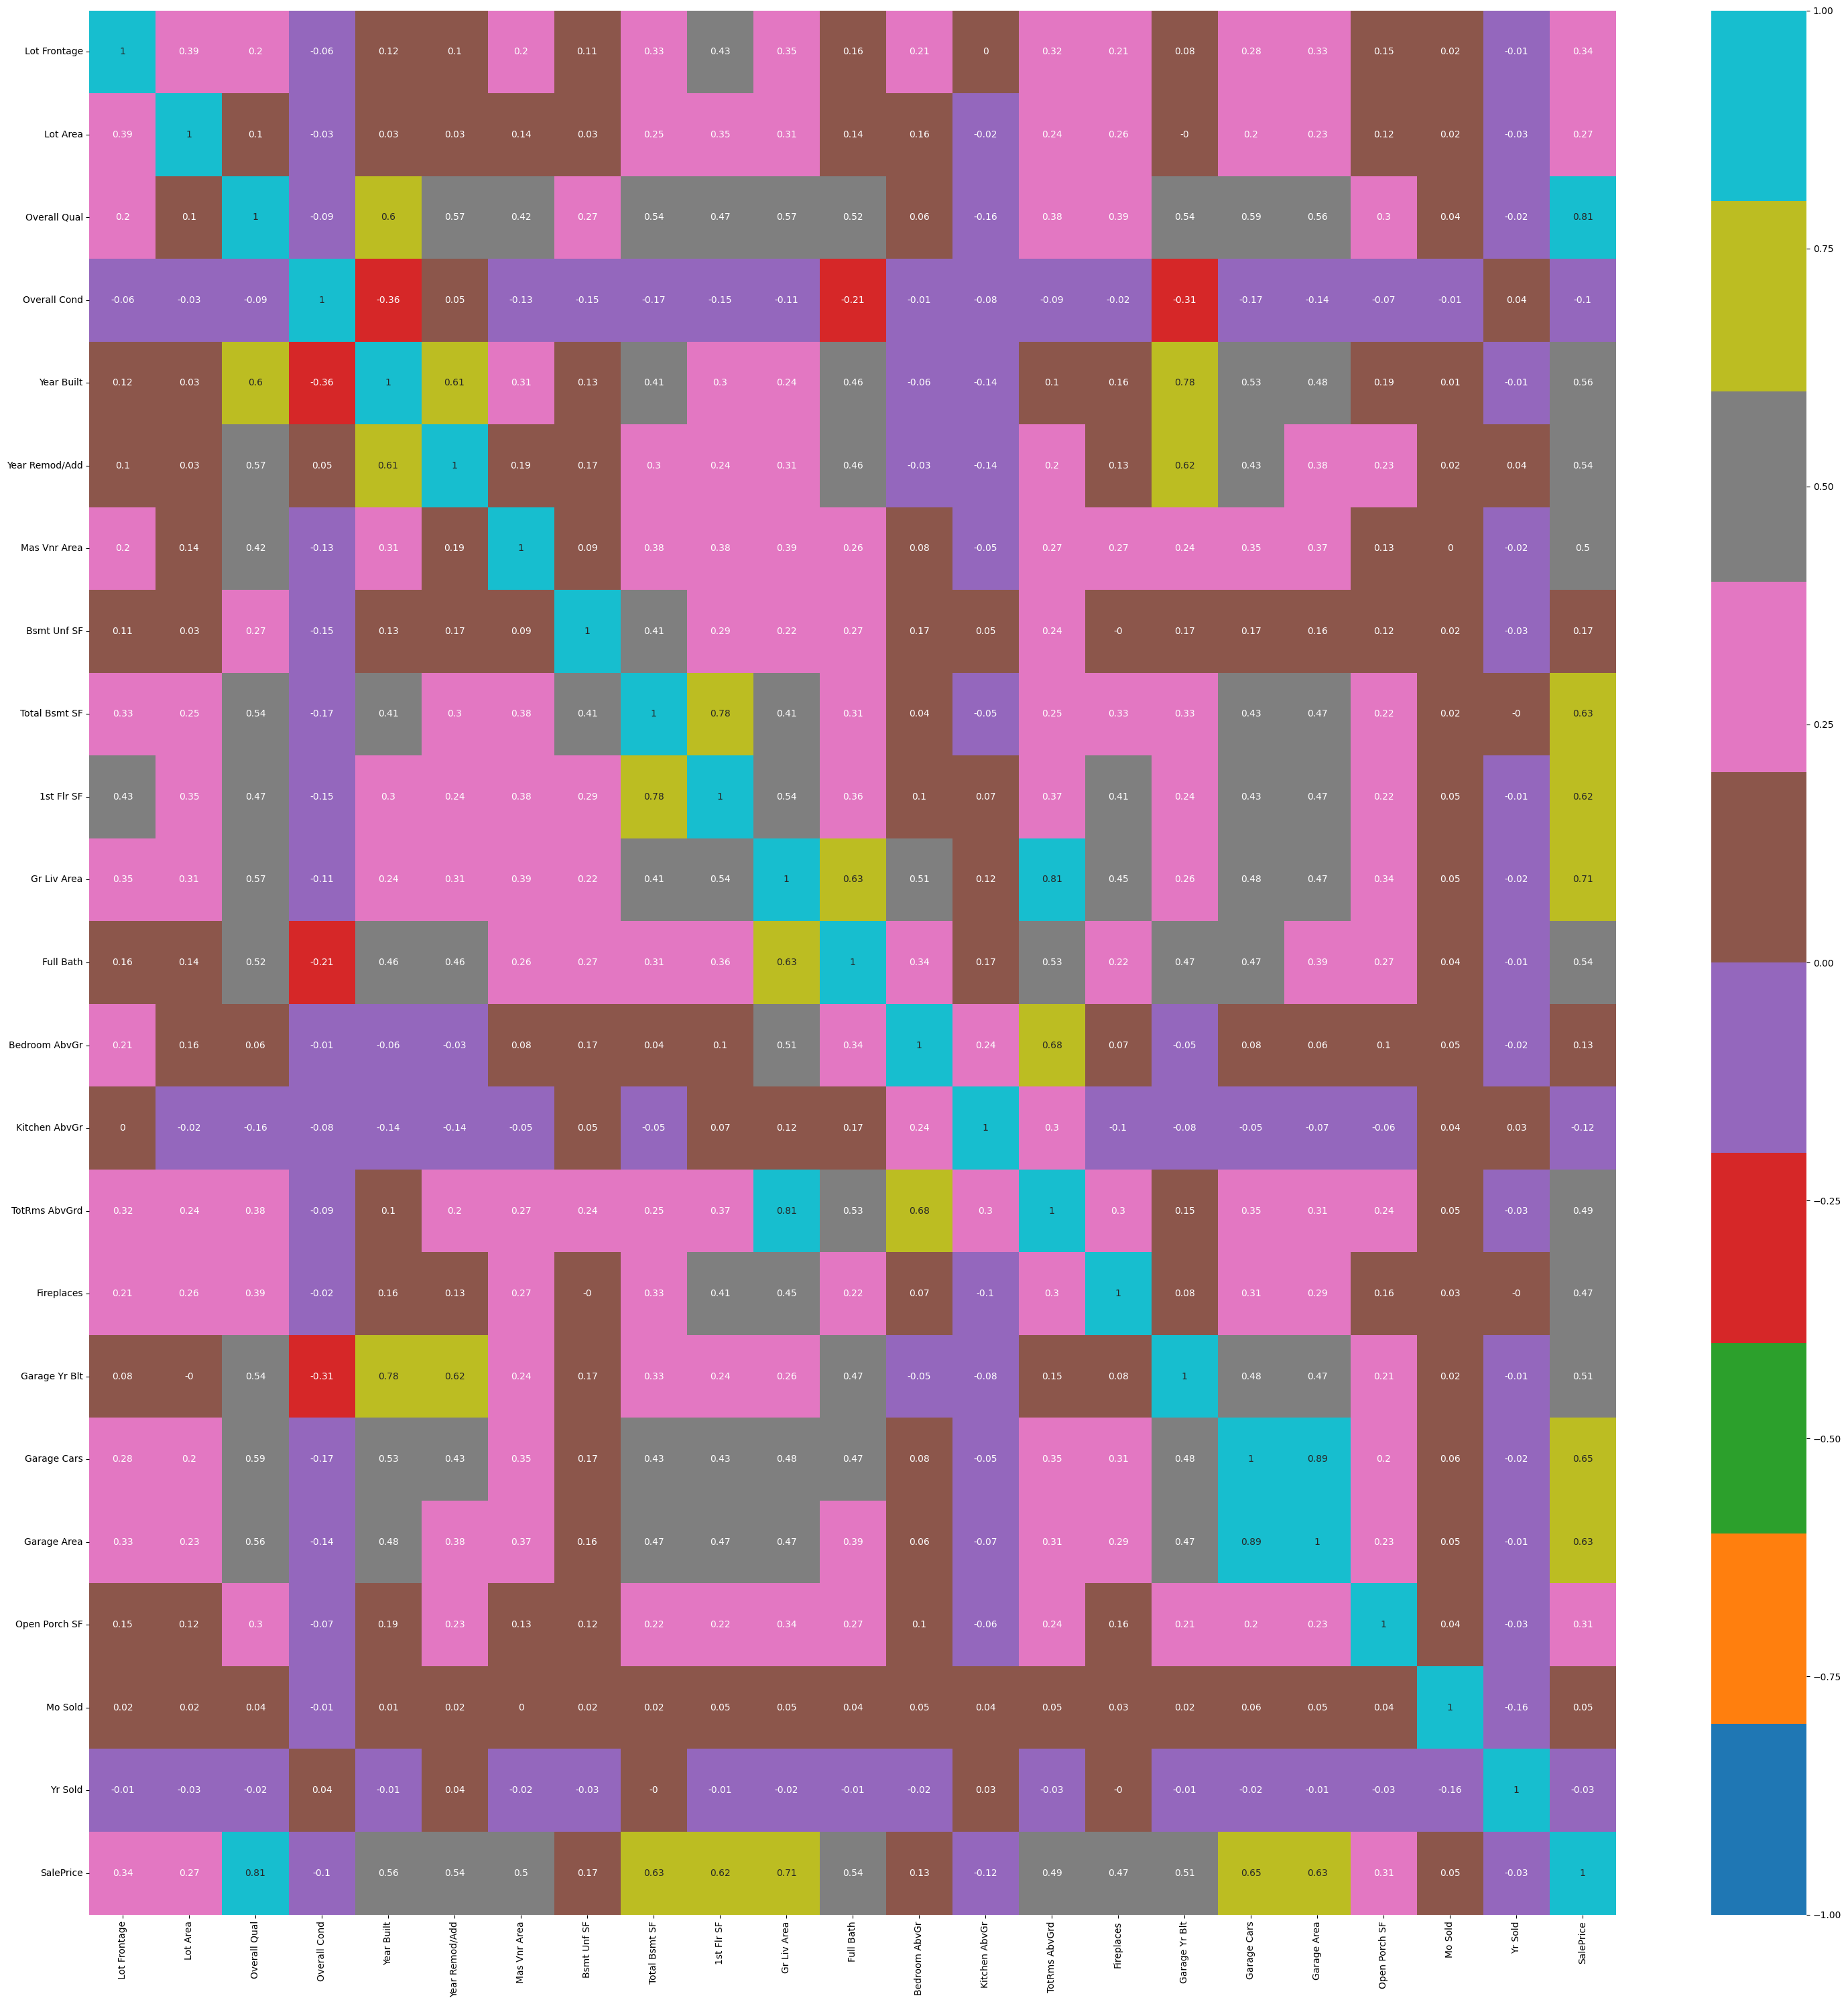

In [62]:
# Show correlations for numerical only df
plt.figure(figsize=(30,30))
sns.heatmap(df_only_num.corr().round(2), annot = True, vmin = -1, vmax = 1, cmap = 'tab10')
plt.tight_layout()
plt.show()


Columns that have linearity to target variable:

  - Columns to drop:
    - Overall Cond, Bsmt Unit SF, Bedroom AbvGr, Kitchen AboveGr, Mo Sold, Yr Sold

In [63]:
# Dropping columns with no linearity
df_only_num_no_lin = df_only_num.drop(columns =["Overall Cond", "Bsmt Unf SF", "Bedroom AbvGr", "Kitchen AbvGr", "Mo Sold", "Yr Sold"])
df_only_num_no_lin

Lot Frontage  Lot Area  Overall Qual  Year Built  Year Remod/Add  \
0             62.0     14299             4        1964            1964   
1             72.0     10791             4        1967            1967   
2             50.0      9000             6        1937            1950   
3             68.0      7379             8        2000            2000   
4             60.0      7200             7        1936            2007   
...            ...       ...           ...         ...             ...   
2632          52.0      6240             6        1934            1950   
2633          74.0     10778             7        1990            1991   
2634          61.0      3782             8        1981            1981   
2635          78.0     10140             6        1974            1974   
2636          41.0     12460             7        1999            2000   

      Mas Vnr Area  Total Bsmt SF  1st Flr SF  Gr Liv Area  Full Bath  \
0              0.0         1005.0        1005         1005          1   
1              0.0            0.0        1296         1296          2   
2              0.0          780.0         780         1375          1   
3              0.0          975.0         975         1848          2   
4              0.0          560.0         575         1135          1   
...            ...            ...         ...          ...        ...   
2632           0.0          816.0         816         1176          1   
2633           0.0         1054.0        1061         1061          1   
2634           0.0         1226.0        1226         1226          1   
2635         174.0         1064.0        1350         1350          2   
2636           0.0         1037.0        1037         2322          2   

      TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
0                 5           0         1964.0          2.0        440.0   
1                 6           0         1967.0          2.0        516.0   
2                 6           1         1979.0          1.0        544.0   
3                 7           1         2000.0          2.0        592.0   
4                 6           0         1971.0          2.0        576.0   
...             ...         ...            ...          ...          ...   
2632              6           1         1985.0          2.0        528.0   
2633              4           0         1990.0          2.0        462.0   
2634              4           2         1981.0          2.0        484.0   
2635              7           1         1974.0          2.0        478.0   
2636              8           1         1999.0          2.0        400.0   

      Open Porch SF  SalePrice  
0                 0     115400  
1                 0      90000  
2               162     141000  
3               184     254000  
4                 0     155000  
...             ...        ...  
2632              0     114500  
2633             36     162000  
2634             78     211500  
2635              0     165000  
2636             44     225000  

[2637 rows x 17 columns]

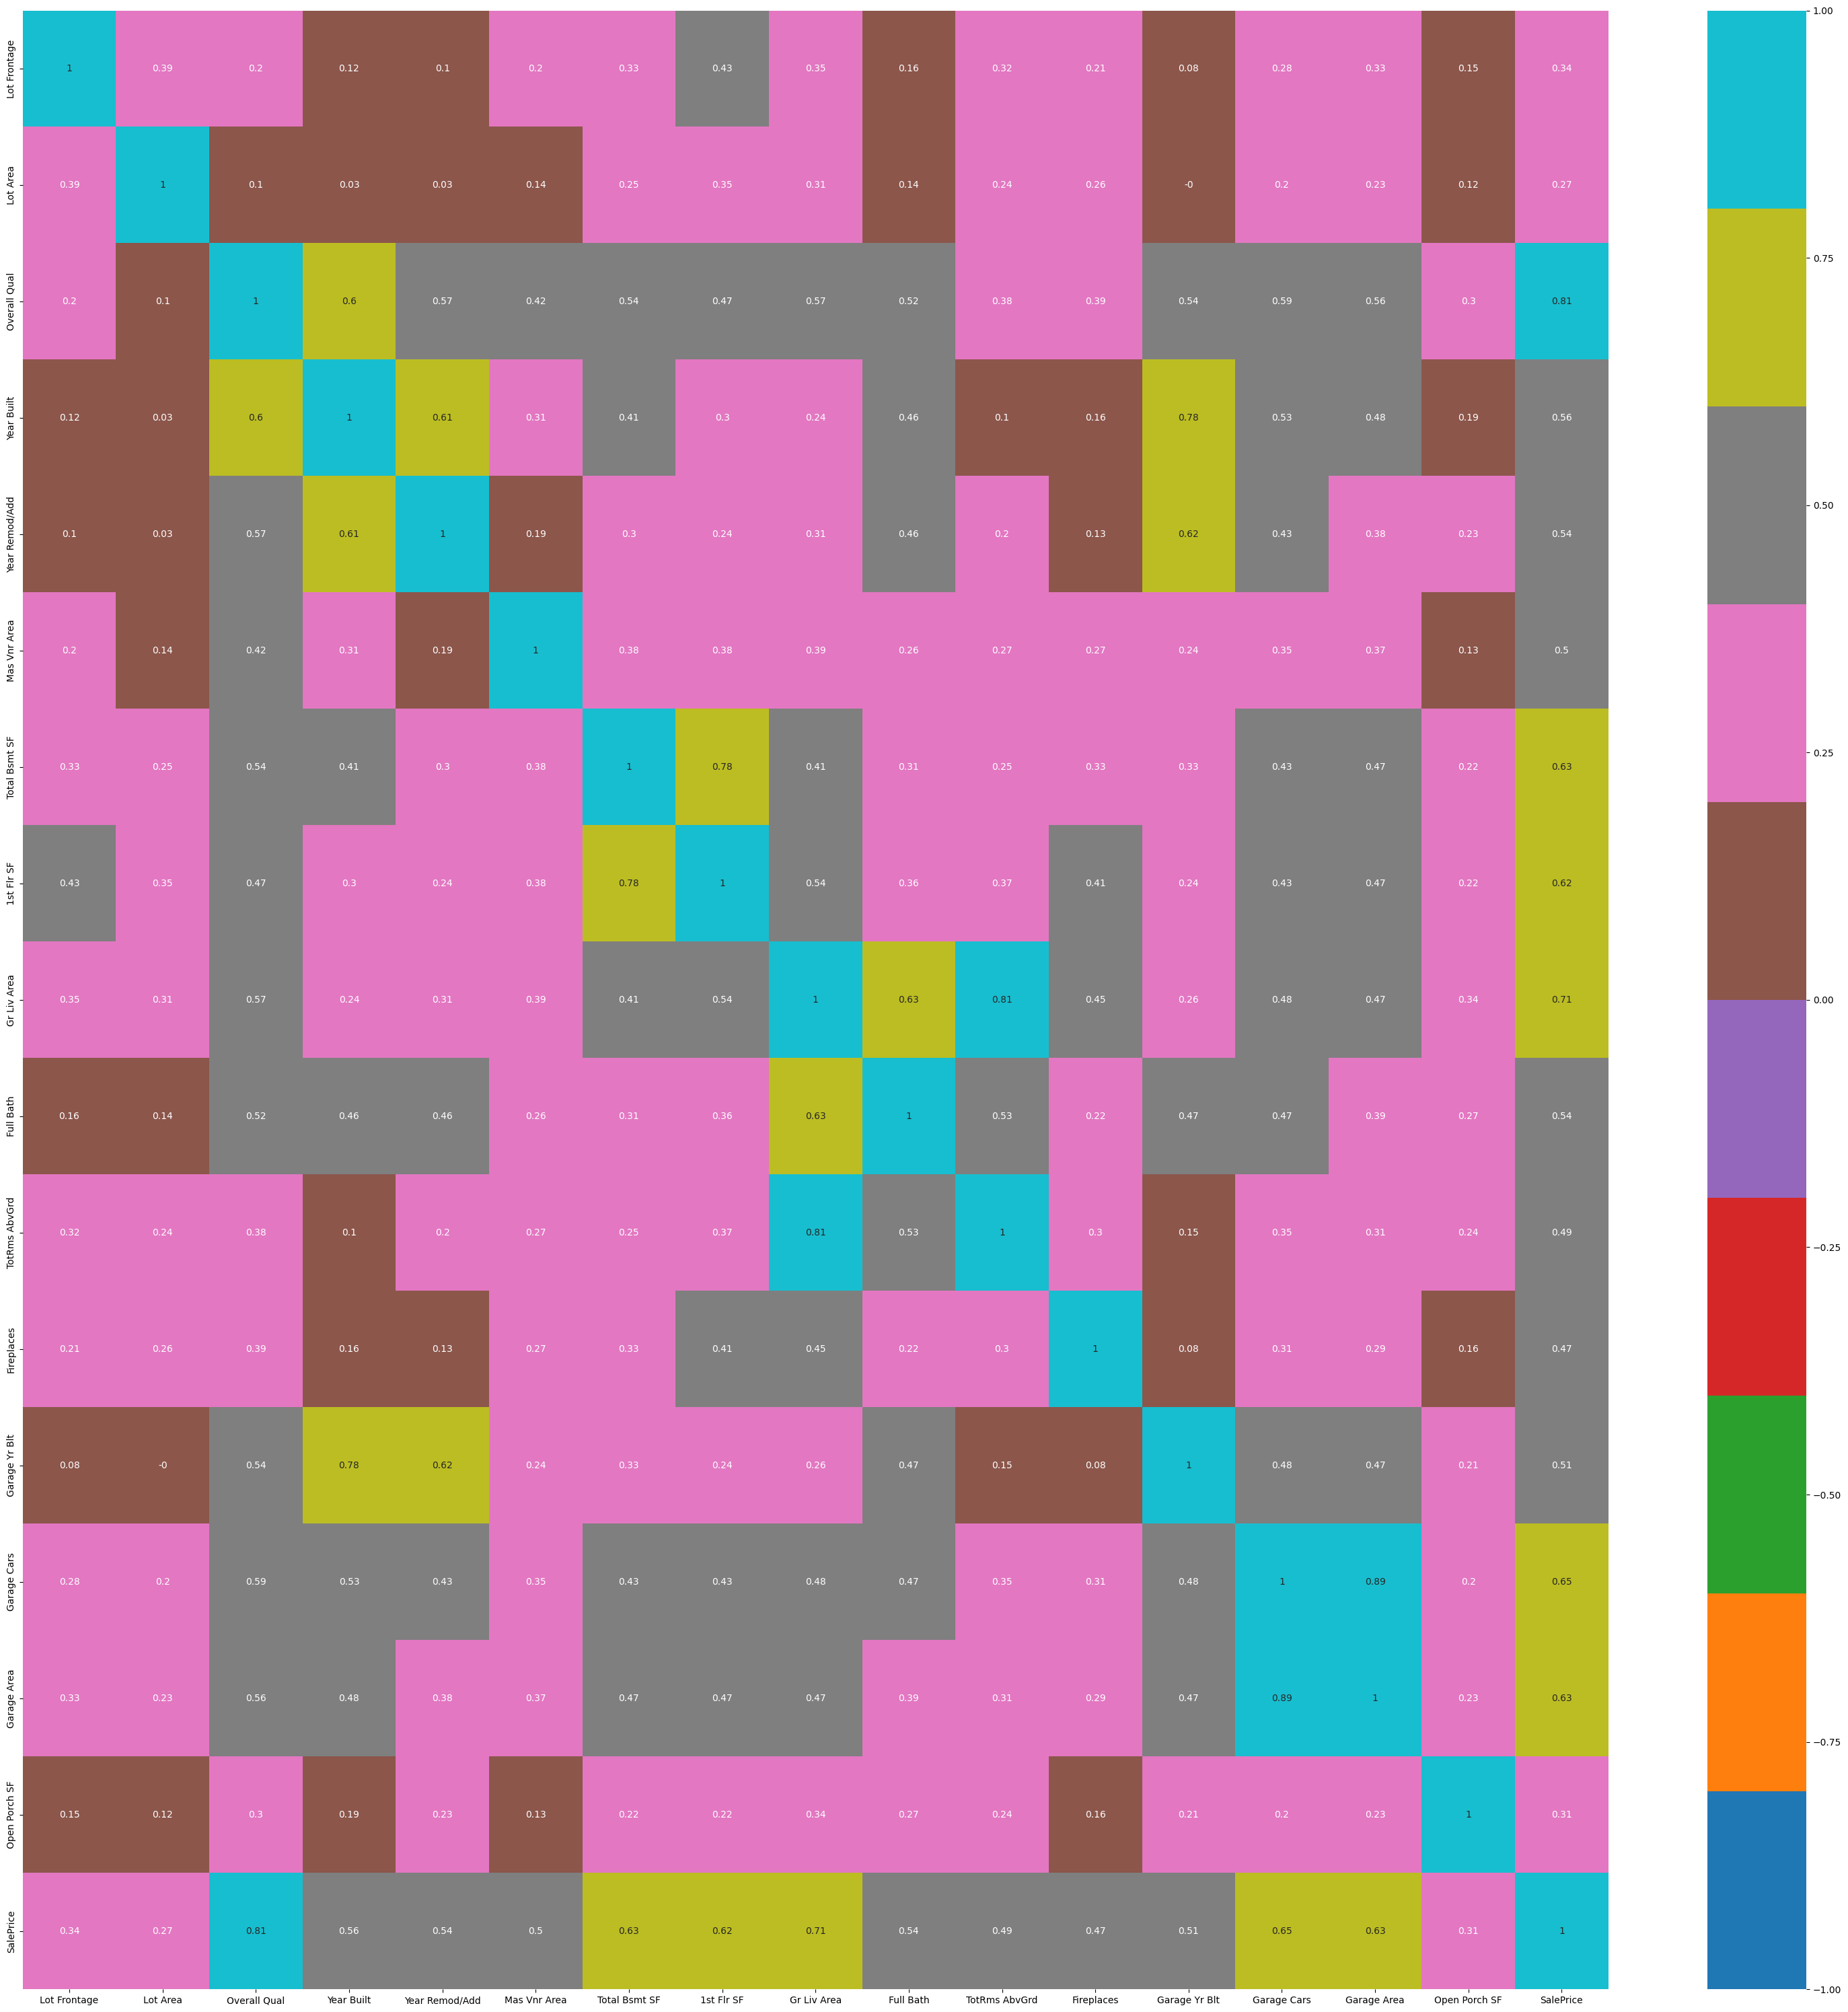

In [64]:
# Show correlations for numerical only and no linearity with target df
plt.figure(figsize=(30,30))
sns.heatmap(df_only_num_no_lin.corr().round(2), annot = True, vmin = -1, vmax = 1, cmap = 'tab10')
plt.tight_layout()
plt.show()

Non-independent features

- Gr Liv Area & TotRms AbvGrd
- Garage Yr Blt & Year Built
- Full Bath & Gr Liv Area
- Year Built & Overall Quality

Drop TotRms AbvGrd & Full Bath & Garage Year Built

Drop Remaining Linearity Columns

- Lot Frontage
- Lot Area
- Open Porch SF

In [65]:
# Keep features with a > 50% linearity with target
fin_df_only_num = df_only_num_no_lin.drop(columns = ["Lot Frontage", "Lot Area", "Open Porch SF"])
fin_df_only_num

Overall Qual  Year Built  Year Remod/Add  Mas Vnr Area  Total Bsmt SF  \
0                4        1964            1964           0.0         1005.0   
1                4        1967            1967           0.0            0.0   
2                6        1937            1950           0.0          780.0   
3                8        2000            2000           0.0          975.0   
4                7        1936            2007           0.0          560.0   
...            ...         ...             ...           ...            ...   
2632             6        1934            1950           0.0          816.0   
2633             7        1990            1991           0.0         1054.0   
2634             8        1981            1981           0.0         1226.0   
2635             6        1974            1974         174.0         1064.0   
2636             7        1999            2000           0.0         1037.0   

      1st Flr SF  Gr Liv Area  Full Bath  TotRms AbvGrd  Fireplaces  \
0           1005         1005          1              5           0   
1           1296         1296          2              6           0   
2            780         1375          1              6           1   
3            975         1848          2              7           1   
4            575         1135          1              6           0   
...          ...          ...        ...            ...         ...   
2632         816         1176          1              6           1   
2633        1061         1061          1              4           0   
2634        1226         1226          1              4           2   
2635        1350         1350          2              7           1   
2636        1037         2322          2              8           1   

      Garage Yr Blt  Garage Cars  Garage Area  SalePrice  
0            1964.0          2.0        440.0     115400  
1            1967.0          2.0        516.0      90000  
2            1979.0          1.0        544.0     141000  
3            2000.0          2.0        592.0     254000  
4            1971.0          2.0        576.0     155000  
...             ...          ...          ...        ...  
2632         1985.0          2.0        528.0     114500  
2633         1990.0          2.0        462.0     162000  
2634         1981.0          2.0        484.0     211500  
2635         1974.0          2.0        478.0     165000  
2636         1999.0          2.0        400.0     225000  

[2637 rows x 14 columns]

In [66]:
# Remove features with non-independence and low-linearity
#fin_df_only_num = df_only_num_no_lin.drop(columns = ['TotRms AbvGrd', 'Full Bath', 'Garage Yr Blt', "Lot Frontage", "Lot Area", "Open Porch SF", "Year Built", "1st Flr SF", "Year Remod/Add", "Mas Vnr Area", "Fireplaces", "Garage Area"])
#fin_df_only_num
# RMSPE was around 23%

In [67]:
# Leave only Overall Qual because of the high linearity with target
# fin_df_only_num = fin_df_only_num.drop(columns = ['Total Bsmt SF',	"Gr Liv Area",	"Garage Cars"])
# fin_df_only_num
# RMSPE was around 29%

In [68]:
# Correlations for final dataset
fin_df_only_num.corr().round(2)

Overall Qual  Year Built  Year Remod/Add  Mas Vnr Area  \
Overall Qual            1.00        0.60            0.57          0.42   
Year Built              0.60        1.00            0.61          0.31   
Year Remod/Add          0.57        0.61            1.00          0.19   
Mas Vnr Area            0.42        0.31            0.19          1.00   
Total Bsmt SF           0.54        0.41            0.30          0.38   
1st Flr SF              0.47        0.30            0.24          0.38   
Gr Liv Area             0.57        0.24            0.31          0.39   
Full Bath               0.52        0.46            0.46          0.26   
TotRms AbvGrd           0.38        0.10            0.20          0.27   
Fireplaces              0.39        0.16            0.13          0.27   
Garage Yr Blt           0.54        0.78            0.62          0.24   
Garage Cars             0.59        0.53            0.43          0.35   
Garage Area             0.56        0.48            0.38          0.37   
SalePrice               0.81        0.56            0.54          0.50   

                Total Bsmt SF  1st Flr SF  Gr Liv Area  Full Bath  \
Overall Qual             0.54        0.47         0.57       0.52   
Year Built               0.41        0.30         0.24       0.46   
Year Remod/Add           0.30        0.24         0.31       0.46   
Mas Vnr Area             0.38        0.38         0.39       0.26   
Total Bsmt SF            1.00        0.78         0.41       0.31   
1st Flr SF               0.78        1.00         0.54       0.36   
Gr Liv Area              0.41        0.54         1.00       0.63   
Full Bath                0.31        0.36         0.63       1.00   
TotRms AbvGrd            0.25        0.37         0.81       0.53   
Fireplaces               0.33        0.41         0.45       0.22   
Garage Yr Blt            0.33        0.24         0.26       0.47   
Garage Cars              0.43        0.43         0.48       0.47   
Garage Area              0.47        0.47         0.47       0.39   
SalePrice                0.63        0.62         0.71       0.54   

                TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  \
Overall Qual             0.38        0.39           0.54         0.59   
Year Built               0.10        0.16           0.78         0.53   
Year Remod/Add           0.20        0.13           0.62         0.43   
Mas Vnr Area             0.27        0.27           0.24         0.35   
Total Bsmt SF            0.25        0.33           0.33         0.43   
1st Flr SF               0.37        0.41           0.24         0.43   
Gr Liv Area              0.81        0.45           0.26         0.48   
Full Bath                0.53        0.22           0.47         0.47   
TotRms AbvGrd            1.00        0.30           0.15         0.35   
Fireplaces               0.30        1.00           0.08         0.31   
Garage Yr Blt            0.15        0.08           1.00         0.48   
Garage Cars              0.35        0.31           0.48         1.00   
Garage Area              0.31        0.29           0.47         0.89   
SalePrice                0.49        0.47           0.51         0.65   

                Garage Area  SalePrice  
Overall Qual           0.56       0.81  
Year Built             0.48       0.56  
Year Remod/Add         0.38       0.54  
Mas Vnr Area           0.37       0.50  
Total Bsmt SF          0.47       0.63  
1st Flr SF             0.47       0.62  
Gr Liv Area            0.47       0.71  
Full Bath              0.39       0.54  
TotRms AbvGrd          0.31       0.49  
Fireplaces             0.29       0.47  
Garage Yr Blt          0.47       0.51  
Garage Cars            0.89       0.65  
Garage Area            1.00       0.63  
SalePrice              0.63       1.00

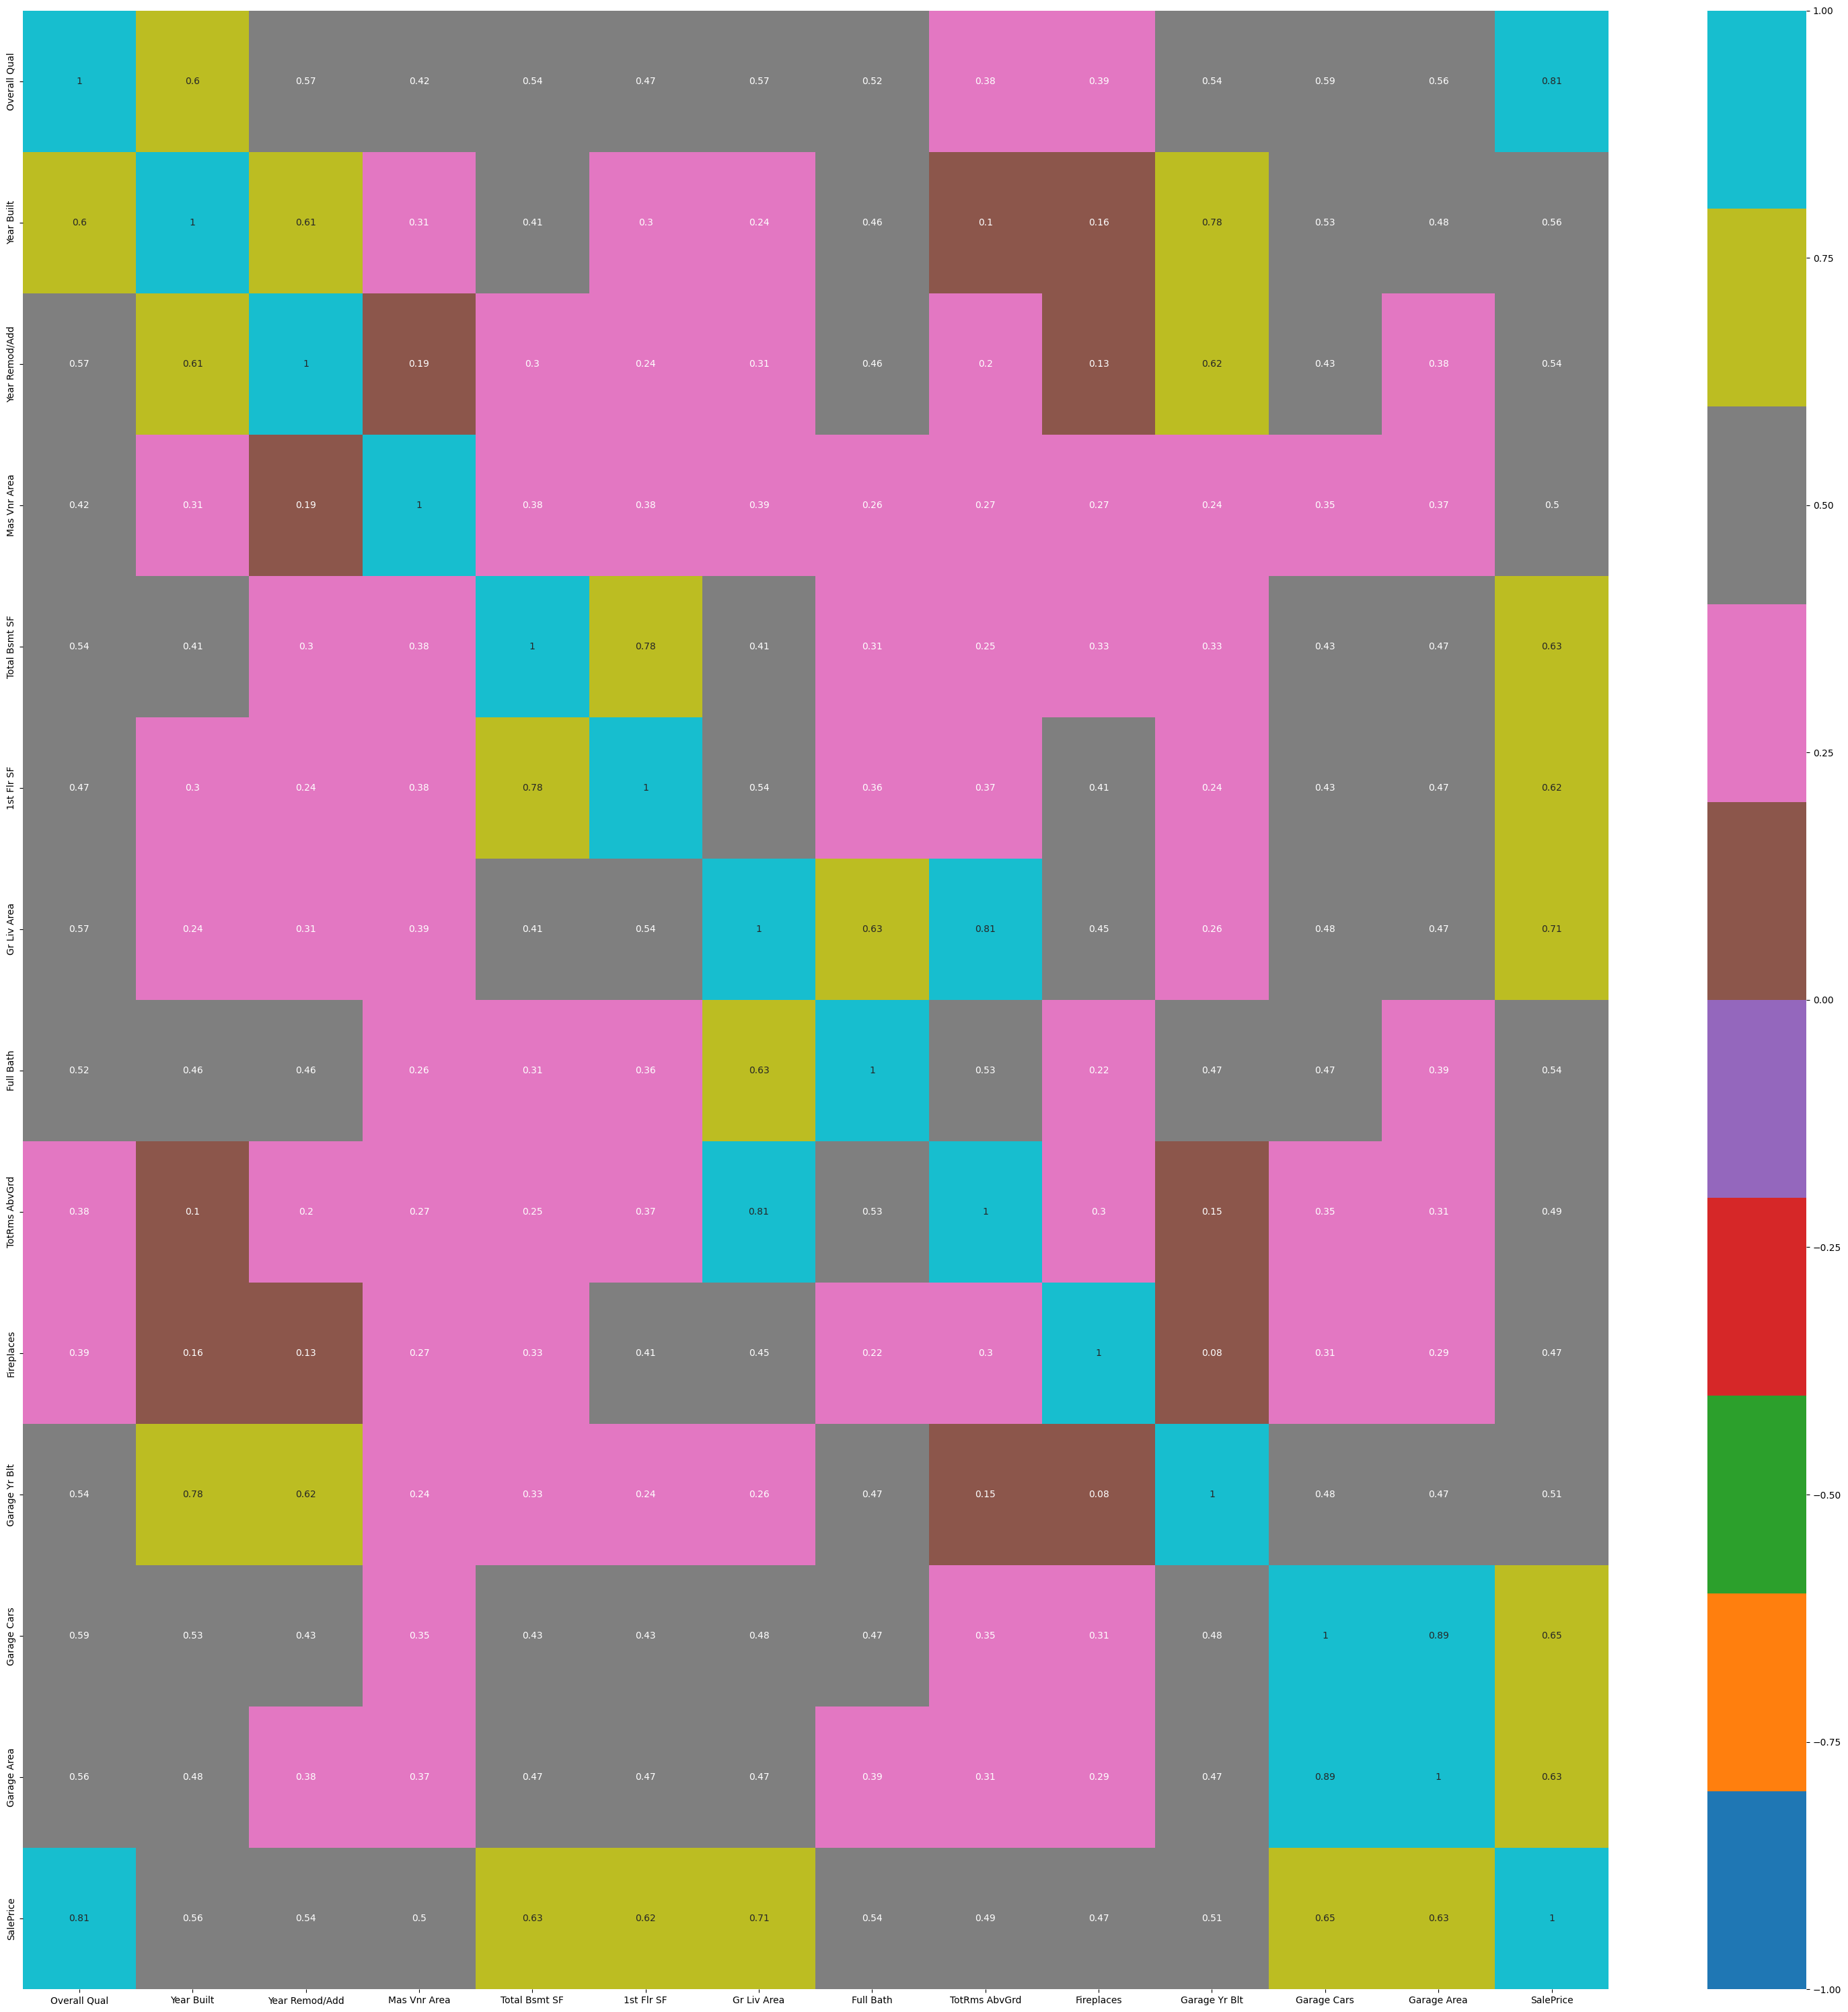

In [69]:
# Show correlations for numerical only and no linearity with target df
plt.figure(figsize=(30,30))
sns.heatmap(fin_df_only_num.corr().round(2), annot = True, vmin = -1, vmax = 1, cmap = 'tab10')
plt.tight_layout()

plt.show()

Features I am left with (Numeric Only):

- Overall Qual
- Total Bsmt Sf
- Gr Liv Area
- Garage Cars

Target:
- Sale Price

In [70]:
# Checking for outliers... Scaling Purposes

outlier_summary = {}

for col in fin_df_only_num.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = fin_df_only_num[col].quantile(0.25)
    Q3 = fin_df_only_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many outliers
    outliers = ((fin_df_only_num[col] < lower) | (fin_df_only_num[col] > upper)).sum()
    outlier_summary[col] = outliers

# Sort columns by number of outliers
outlier_summary = pd.Series(outlier_summary).sort_values(ascending=False)
print(outlier_summary)

Mas Vnr Area      183
SalePrice         120
Total Bsmt SF     109
Gr Liv Area        62
TotRms AbvGrd      46
1st Flr SF         39
Garage Area        35
Garage Cars        15
Fireplaces         13
Year Built          9
Garage Yr Blt       9
Overall Qual        4
Full Bath           3
Year Remod/Add      0
dtype: int64


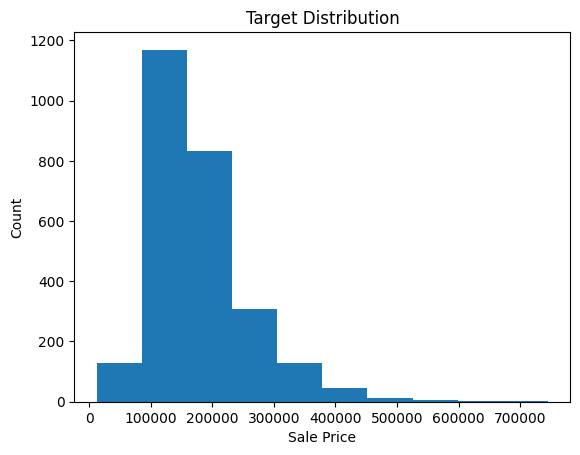

In [71]:
# Target Distribution
plt.hist(df['SalePrice'])
plt.title('Target Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Count')
# save the figure
plt.savefig("Target Distribution (Before Log).png", dpi=300, bbox_inches='tight')
plt.show()


In [72]:
fin_df_only_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall Qual    2637 non-null   int64  
 1   Year Built      2637 non-null   int64  
 2   Year Remod/Add  2637 non-null   int64  
 3   Mas Vnr Area    2637 non-null   float64
 4   Total Bsmt SF   2637 non-null   float64
 5   1st Flr SF      2637 non-null   int64  
 6   Gr Liv Area     2637 non-null   int64  
 7   Full Bath       2637 non-null   int64  
 8   TotRms AbvGrd   2637 non-null   int64  
 9   Fireplaces      2637 non-null   int64  
 10  Garage Yr Blt   2637 non-null   float64
 11  Garage Cars     2637 non-null   float64
 12  Garage Area     2637 non-null   float64
 13  SalePrice       2637 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 288.6 KB


## Processing



In [73]:
# Import Necessary Libraries for Model

import sklearn
import statsmodels.api as sm
from sklearn import datasets, metrics, model_selection, preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [74]:
# Split data into train and test sets
features = fin_df_only_num.drop(columns = "SalePrice")
# target = fin_df_only_num["SalePrice"]
target = np.log1p(fin_df_only_num['SalePrice'])

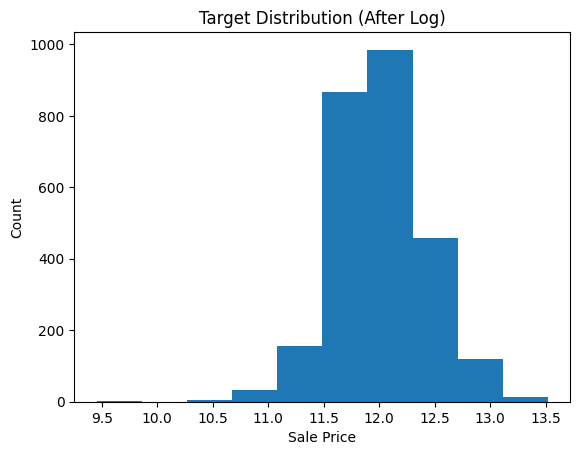

In [75]:
# Target Distribution (after log)
plt.hist(target)
plt.title('Target Distribution (After Log)')
plt.xlabel('Sale Price')
plt.ylabel('Count')
# save the figure
plt.savefig("Target Distribution (After Log).png", dpi=300, bbox_inches='tight')
plt.show()

In [76]:
# Ensure split
features

Overall Qual  Year Built  Year Remod/Add  Mas Vnr Area  Total Bsmt SF  \
0                4        1964            1964           0.0         1005.0   
1                4        1967            1967           0.0            0.0   
2                6        1937            1950           0.0          780.0   
3                8        2000            2000           0.0          975.0   
4                7        1936            2007           0.0          560.0   
...            ...         ...             ...           ...            ...   
2632             6        1934            1950           0.0          816.0   
2633             7        1990            1991           0.0         1054.0   
2634             8        1981            1981           0.0         1226.0   
2635             6        1974            1974         174.0         1064.0   
2636             7        1999            2000           0.0         1037.0   

      1st Flr SF  Gr Liv Area  Full Bath  TotRms AbvGrd  Fireplaces  \
0           1005         1005          1              5           0   
1           1296         1296          2              6           0   
2            780         1375          1              6           1   
3            975         1848          2              7           1   
4            575         1135          1              6           0   
...          ...          ...        ...            ...         ...   
2632         816         1176          1              6           1   
2633        1061         1061          1              4           0   
2634        1226         1226          1              4           2   
2635        1350         1350          2              7           1   
2636        1037         2322          2              8           1   

      Garage Yr Blt  Garage Cars  Garage Area  
0            1964.0          2.0        440.0  
1            1967.0          2.0        516.0  
2            1979.0          1.0        544.0  
3            2000.0          2.0        592.0  
4            1971.0          2.0        576.0  
...             ...          ...          ...  
2632         1985.0          2.0        528.0  
2633         1990.0          2.0        462.0  
2634         1981.0          2.0        484.0  
2635         1974.0          2.0        478.0  
2636         1999.0          2.0        400.0  

[2637 rows x 13 columns]

In [77]:
# Ensure split
target

0       11.656168
1       11.407576
2       11.856522
3       12.445093
4       11.951187
          ...    
2632    11.648339
2633    11.995358
2634    12.261985
2635    12.013707
2636    12.323860
Name: SalePrice, Length: 2637, dtype: float64

In [78]:
features.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area'],
      dtype='object')

In [79]:
# 1. Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 2. Standard Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Robust Scale
#scaler = preprocessing.RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [80]:
# View scaled features
pd.DataFrame(X_train_scaled, columns=X_train.columns)


Overall Qual  Year Built  Year Remod/Add  Mas Vnr Area  Total Bsmt SF  \
0        -0.782939   -1.570319       -1.623142     -0.559212      -0.050361   
1        -0.069053   -2.199235        0.765397     -0.559212      -1.319743   
2        -0.069053   -0.246286       -0.954351      0.436521       1.093017   
3        -0.069053    0.713637        0.478772      0.060355      -0.818057   
4        -0.069053   -1.702722       -1.623142     -0.559212      -0.538046   
...            ...         ...             ...           ...            ...   
2104     -0.782939   -1.040706       -1.623142     -0.559212      -0.876393   
2105     -0.782939   -0.709698       -0.094477     -0.559212       0.374322   
2106     -0.782939   -0.246286       -0.954351     -0.083473       0.243651   
2107     -0.782939   -0.378690        1.052022     -0.144323      -2.444454   
2108     -0.782939   -2.033731       -0.142248     -0.559212      -1.417747   

      1st Flr SF  Gr Liv Area  Full Bath  TotRms AbvGrd  Fireplaces  \
0      -0.336644     0.392533   0.800088      -0.280419    0.595423   
1       0.181502     0.841475   0.800088       0.358937    0.595423   
2       0.965363     0.037036  -1.012356      -0.280419   -0.923014   
3      -1.210848     0.006565   0.800088      -0.280419    0.595423   
4      -0.565159     0.106104  -1.012356       0.358937    0.595423   
...          ...          ...        ...            ...         ...   
2104   -1.277277    -1.677473  -1.012356      -1.559132   -0.923014   
2105   -0.044356     0.825223  -1.012356       0.358937   -0.923014   
2106   -0.001842    -0.702397  -1.012356      -0.280419    0.595423   
2107    1.642938     0.555046  -1.012356       1.637650    0.595423   
2108   -1.250706    -0.543947  -1.012356      -0.919776   -0.923014   

      Garage Yr Blt  Garage Cars  Garage Area  
0         -2.212502     -1.01497    -0.779948  
1          0.997966      0.30738     0.943330  
2         -0.586949      0.30738    -0.003527  
3          0.591578      0.30738    -0.249709  
4         -1.684197     -1.01497    -0.732606  
...             ...          ...          ...  
2104      -1.155892     -1.01497    -1.026131  
2105      -1.155892     -1.01497    -1.101879  
2106      -0.586949      0.30738     0.053285  
2107      -0.749504      0.30738    -0.647389  
2108      -0.505671      0.30738    -0.155023  

[2109 rows x 13 columns]

In [81]:
pd.DataFrame(X_test_scaled, columns=X_test.columns)


Overall Qual  Year Built  Year Remod/Add  Mas Vnr Area  Total Bsmt SF  \
0        1.358719    0.978444        0.813168      0.856942       1.128018   
1       -0.782939   -0.544194       -1.384288     -0.559212      -0.204367   
2       -0.069053    1.143948        1.099793     -0.559212      -1.007065   
3       -0.069053   -1.570319       -1.623142     -0.559212      -1.004731   
4        0.644833    1.110847        1.004251     -0.559212      -0.745721   
..            ...         ...             ...           ...            ...   
523     -0.782939   -0.742799        1.004251     -0.559212       0.045310   
524     -0.782939    0.812940        0.574314     -0.559212       0.115312   
525     -0.782939   -0.180085       -0.858810     -0.559212      -0.316371   
526     -0.782939   -0.279387       -1.002122     -0.559212      -0.428375   
527     -0.069053   -0.577295        0.765397      0.414394       0.005641   

     1st Flr SF  Gr Liv Area  Full Bath  TotRms AbvGrd  Fireplaces  \
0      1.005220     1.912027   0.800088       0.358937    0.595423   
1     -0.512016    -1.092427  -1.012356      -0.919776   -0.923014   
2     -1.426078    -0.174230   0.800088      -0.280419    0.595423   
3     -0.764446    -0.381434   0.800088      -0.280419   -0.923014   
4     -1.128476    -0.084848   0.800088       0.358937    0.595423   
..          ...          ...        ...            ...         ...   
523   -0.442930     0.051256   0.800088       0.358937    0.595423   
524   -0.147986    -0.814124  -1.012356      -0.280419   -0.923014   
525   -0.639560    -1.189935  -1.012356      -0.280419   -0.923014   
526   -0.767103    -1.287443  -1.012356      -0.919776   -0.923014   
527   -0.272872    -0.909600  -1.012356      -0.280419   -0.923014   

     Garage Yr Blt  Garage Cars  Garage Area  
0         0.916688      0.30738     0.413090  
1        -0.952698     -1.01497    -0.675794  
2         1.160522      0.30738    -0.192898  
3        -2.212502     -1.01497    -0.353863  
4         1.079244      0.30738    -0.297052  
..             ...          ...          ...  
523      -1.196531     -1.01497    -0.841494  
524       0.713494     -1.01497    -1.092411  
525      -0.505671     -1.01497    -0.746808  
526      -0.627587     -1.01497    -0.931445  
527      -0.993337     -1.01497    -0.884103  

[528 rows x 13 columns]

In [82]:
# Train and Test Features/Target Shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2109, 13), (528, 13), (2109,), (528,))

In [83]:
# Load the model
model = LinearRegression()


In [84]:
# Implement Lasso Regression
# Train the model
#model = Lasso(alpha = 1e-15, max_iter=100_000) # Looping through alpha
#model.fit(X_train_scaled, y_train)

In [85]:
# Fit the model
model.fit(X_train_scaled, y_train)


LinearRegression()

In [86]:
# View coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_,
    'Intercept': model.intercept_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

           Feature  Coefficient  Intercept
0     Overall Qual     0.138700  12.017131
6      Gr Liv Area     0.099806  12.017131
1       Year Built     0.062120  12.017131
2   Year Remod/Add     0.055611  12.017131
4    Total Bsmt SF     0.048096  12.017131
9       Fireplaces     0.040575  12.017131
11     Garage Cars     0.037619  12.017131
12     Garage Area     0.018873  12.017131
5       1st Flr SF     0.010242  12.017131
8    TotRms AbvGrd     0.008543  12.017131
3     Mas Vnr Area     0.000036  12.017131
10   Garage Yr Blt    -0.010313  12.017131
7        Full Bath    -0.011710  12.017131


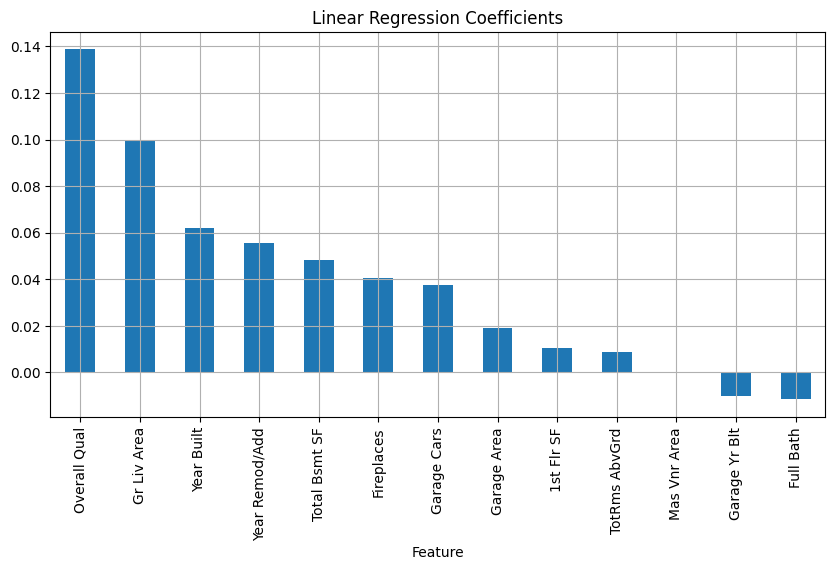

In [87]:
# Plot the coefficients.
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

coefficients.plot(
    x='Feature',
    y='Coefficient',
    kind='bar',
    figsize=(10,5),
    legend=False
)

plt.grid()
plt.title("Linear Regression Coefficients")
plt.show()

In [88]:
# Model Prediction (look at how well the model performed)
y_pred = model.predict(X_test_scaled)

In [89]:
# Convert both back to original dollar prices
y_pred_orig = np.expm1(y_pred)
y_test_orig = np.expm1(y_test)

# Now calculate RMSPE on original prices
# rmspe = np.sqrt(np.mean(((y_test - y_pred) / y_test) ** 2))
# print(f"RMSPE: {rmspe:.4f}")

# Now calculate RMSPE on original prices
rmspe = np.sqrt(np.mean(((y_test_orig - y_pred_orig) / y_test_orig) ** 2))
print(f"RMSPE: {rmspe:.4f}")

RMSPE: 0.1376


In [90]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# if .14 its because we did not transform log back to real world units

RMSE: 0.14


In [91]:
# RMSPE
# rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
# print(f"RMSPE: {rmspe:.2f}%")

# RMSPE natural log
rmspe = np.sqrt(np.mean(np.square((y_test_orig - y_pred_orig) / y_test_orig))) * 100
print(f"RMSPE: {rmspe:.2f}%")


#Standard: 19.71
#Robust: 19.71

# RMSPE: 13.76%
# RMSPE: 13.76%

RMSPE: 13.76%


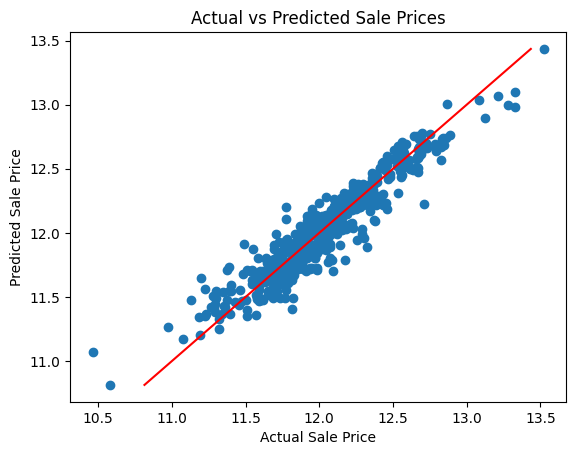

In [92]:
# See how well our model performs on test data
y_pred = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.plot(
    [min(y_pred), max(y_pred)],
    [min(y_pred), max(y_pred)],
    color='red'
)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

#### Residuals:

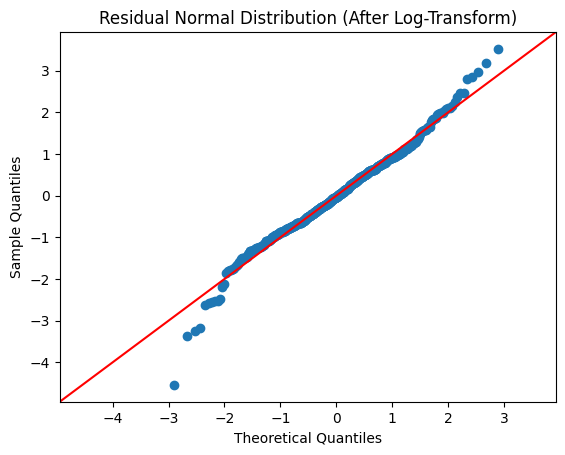

In [93]:
# Residuals

# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ; # We want to see our points to be lined up on the line to see if they are normally distributed
plt.title("Residual Normal Distribution (After Log-Transform)")

# save the figure
plt.savefig("Residual Normal Distribution (After Log-Transform).png", dpi=300, bbox_inches='tight')
plt.show()


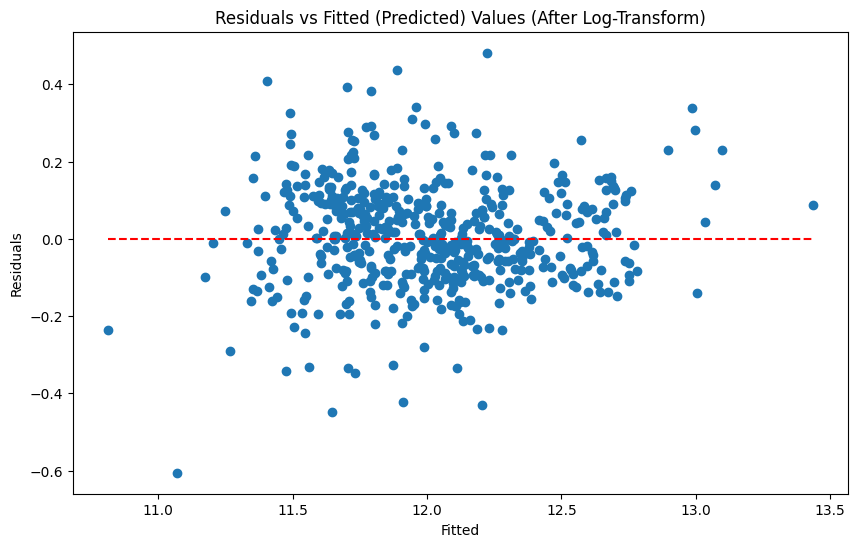

In [94]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Predicted) Values (After Log-Transform)")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;



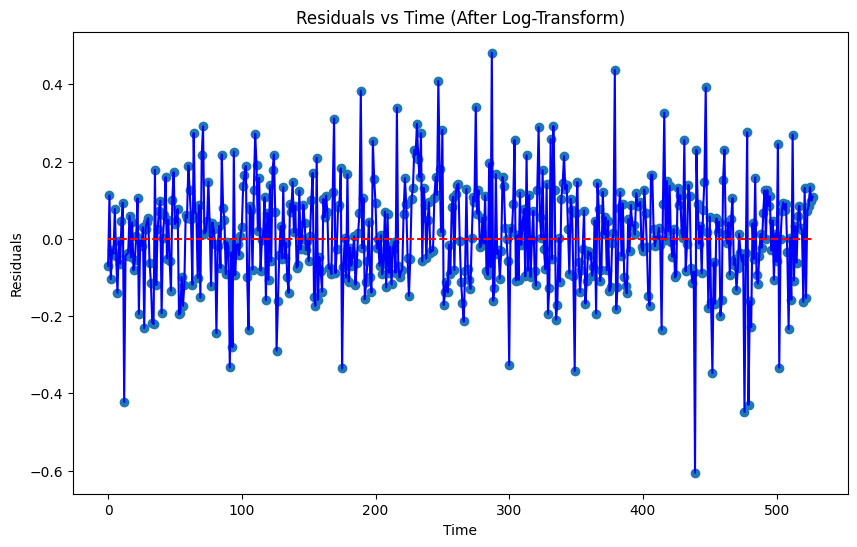

In [95]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.title("Residuals vs Time (After Log-Transform)")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

# save the figure
plt.savefig("Residuals vs Time (After Log-Transform).png", dpi=300, bbox_inches='tight')
plt.show()

In [96]:
# Perform CV
n = 500
results = np.zeros(n)

for idx in range(n):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.20
    )

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # Load model
    model = LinearRegression()

    # model = Lasso(alpha = 1e-4, max_iter=100_000) # Looping through alpha
    # model.fit(X_train_scaled, y_train)

    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Convert both back to original dollar prices
    y_pred_orig = np.expm1(y_pred)
    y_test_orig = np.expm1(y_test)

    # RMSPE
    rmspe = np.sqrt(np.mean(np.square((y_test_orig - y_pred_orig) / y_test_orig))) * 100
    results[idx] = rmspe

print(f"CV RMSPE: {results.mean():.2f}%")
print(f"Number of Predictors: {len(features.columns)}")

CV RMSPE: 29.63%
Number of Predictors: 13


Processing Documentation (1st Pass):

- standared scaler (No significant outliers)
- linear regression model
- Residuals
  - QQPlot - Fair normal distribution - Okay

  - Shape: Slight U-curve → missing nonlinearity - No Good
  - Spread: Wider for high prices → heteroscedasticity (The residuals widen as fitted values increase) - No Good

  - Variance of residuals do not change over time - Good

Processing Documentation (2nd Pass):

- log-transform target
- standared scaler (No significant outliers)
- linear regression model
- Residuals
  - QQPlot - Much better hugging of line / normal dist.
  - Spread: More random. No inherit pattern
  - Variance of residuals imporvement
  
Performed Cross Validation:
- Much higher results than random state 42
-Should be looked at further since it seems like random state 42 literally gave us an outlier score overall.

## Data Visualization/Communication of Results


#### Correlation w/ features I am going to use.

Final_Correlation.png

#### First Pass (Linear Regression)

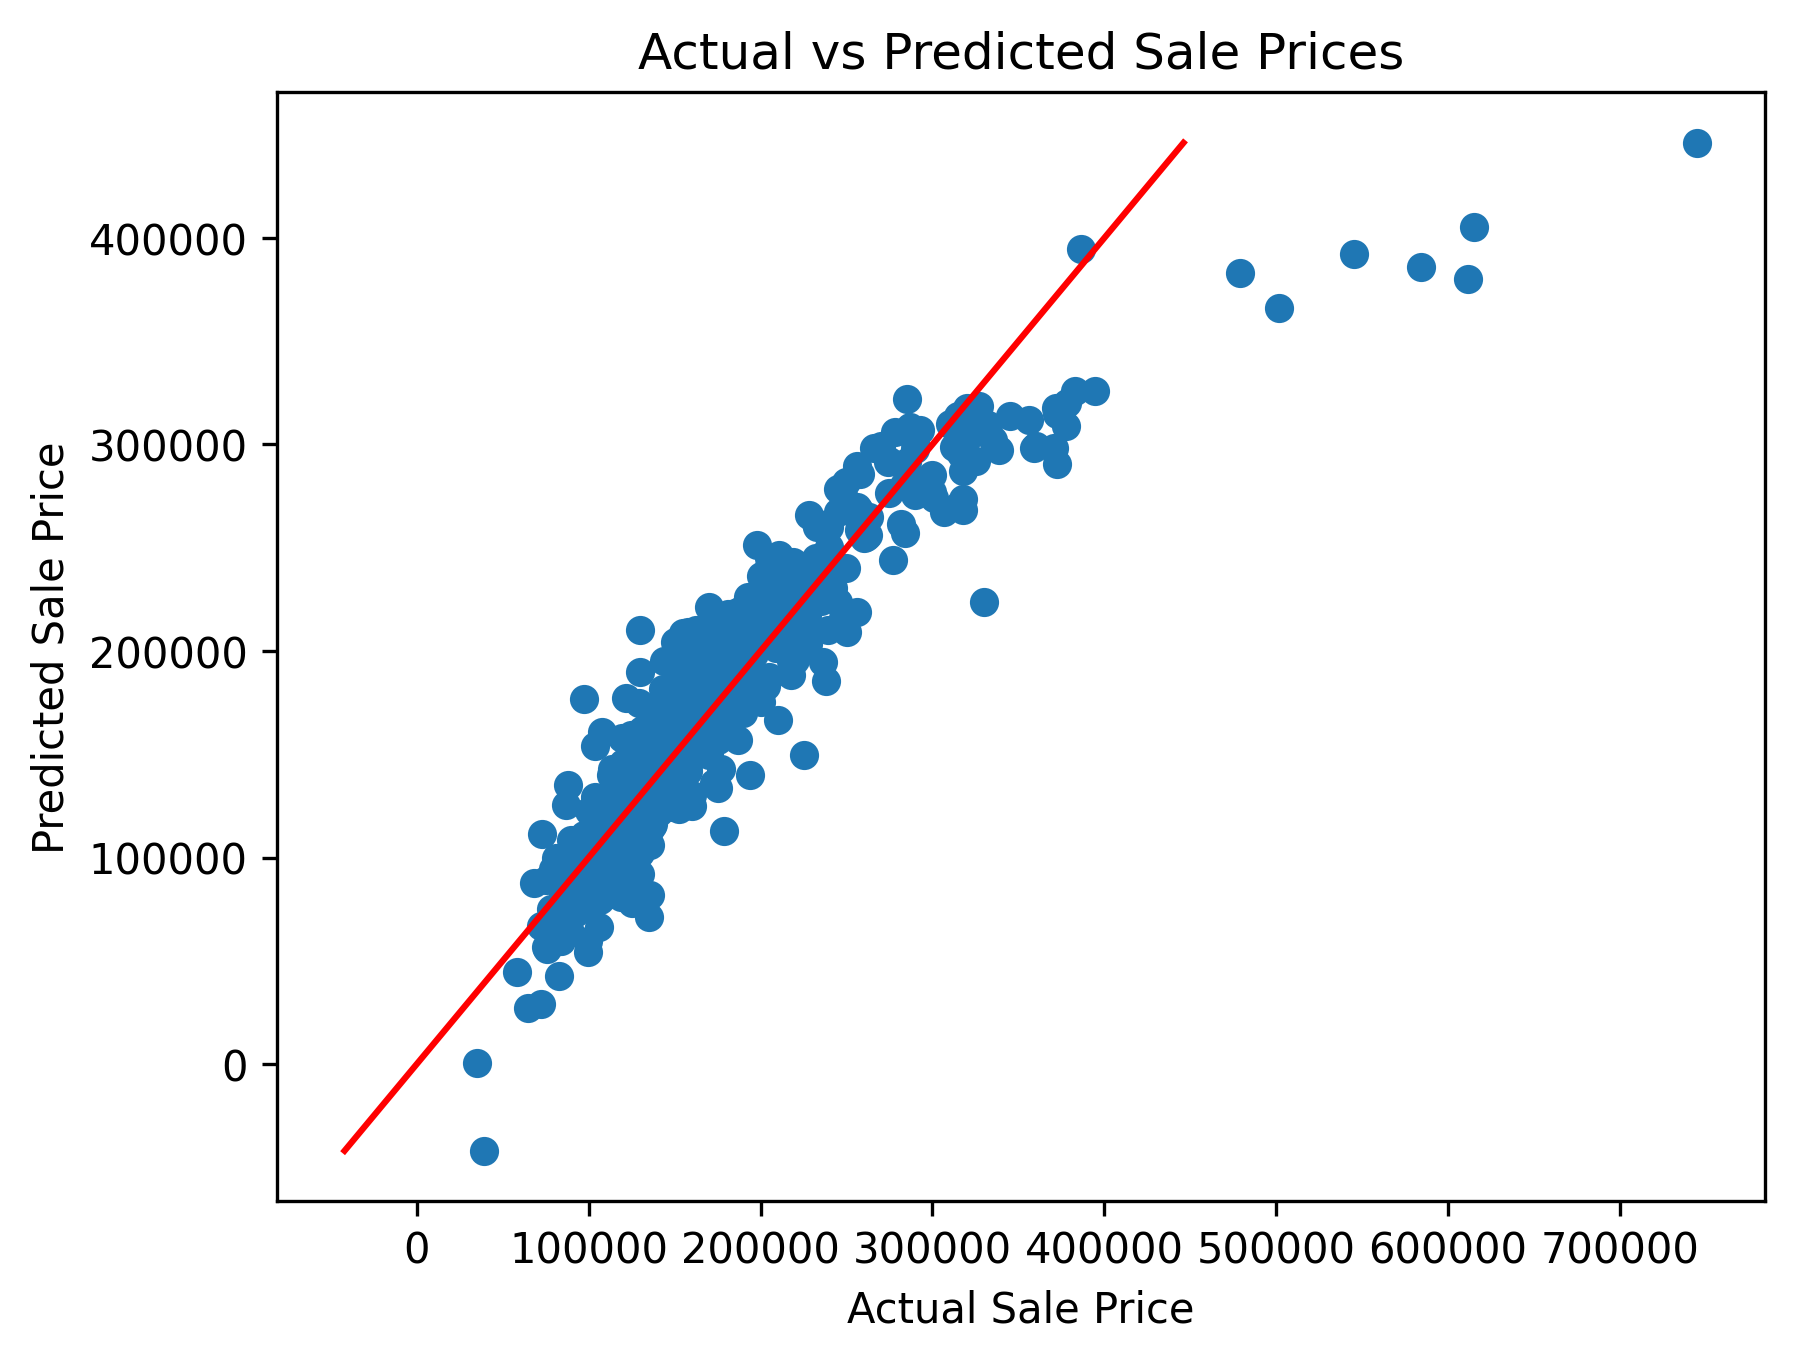

#### Residuals (1st Pass)

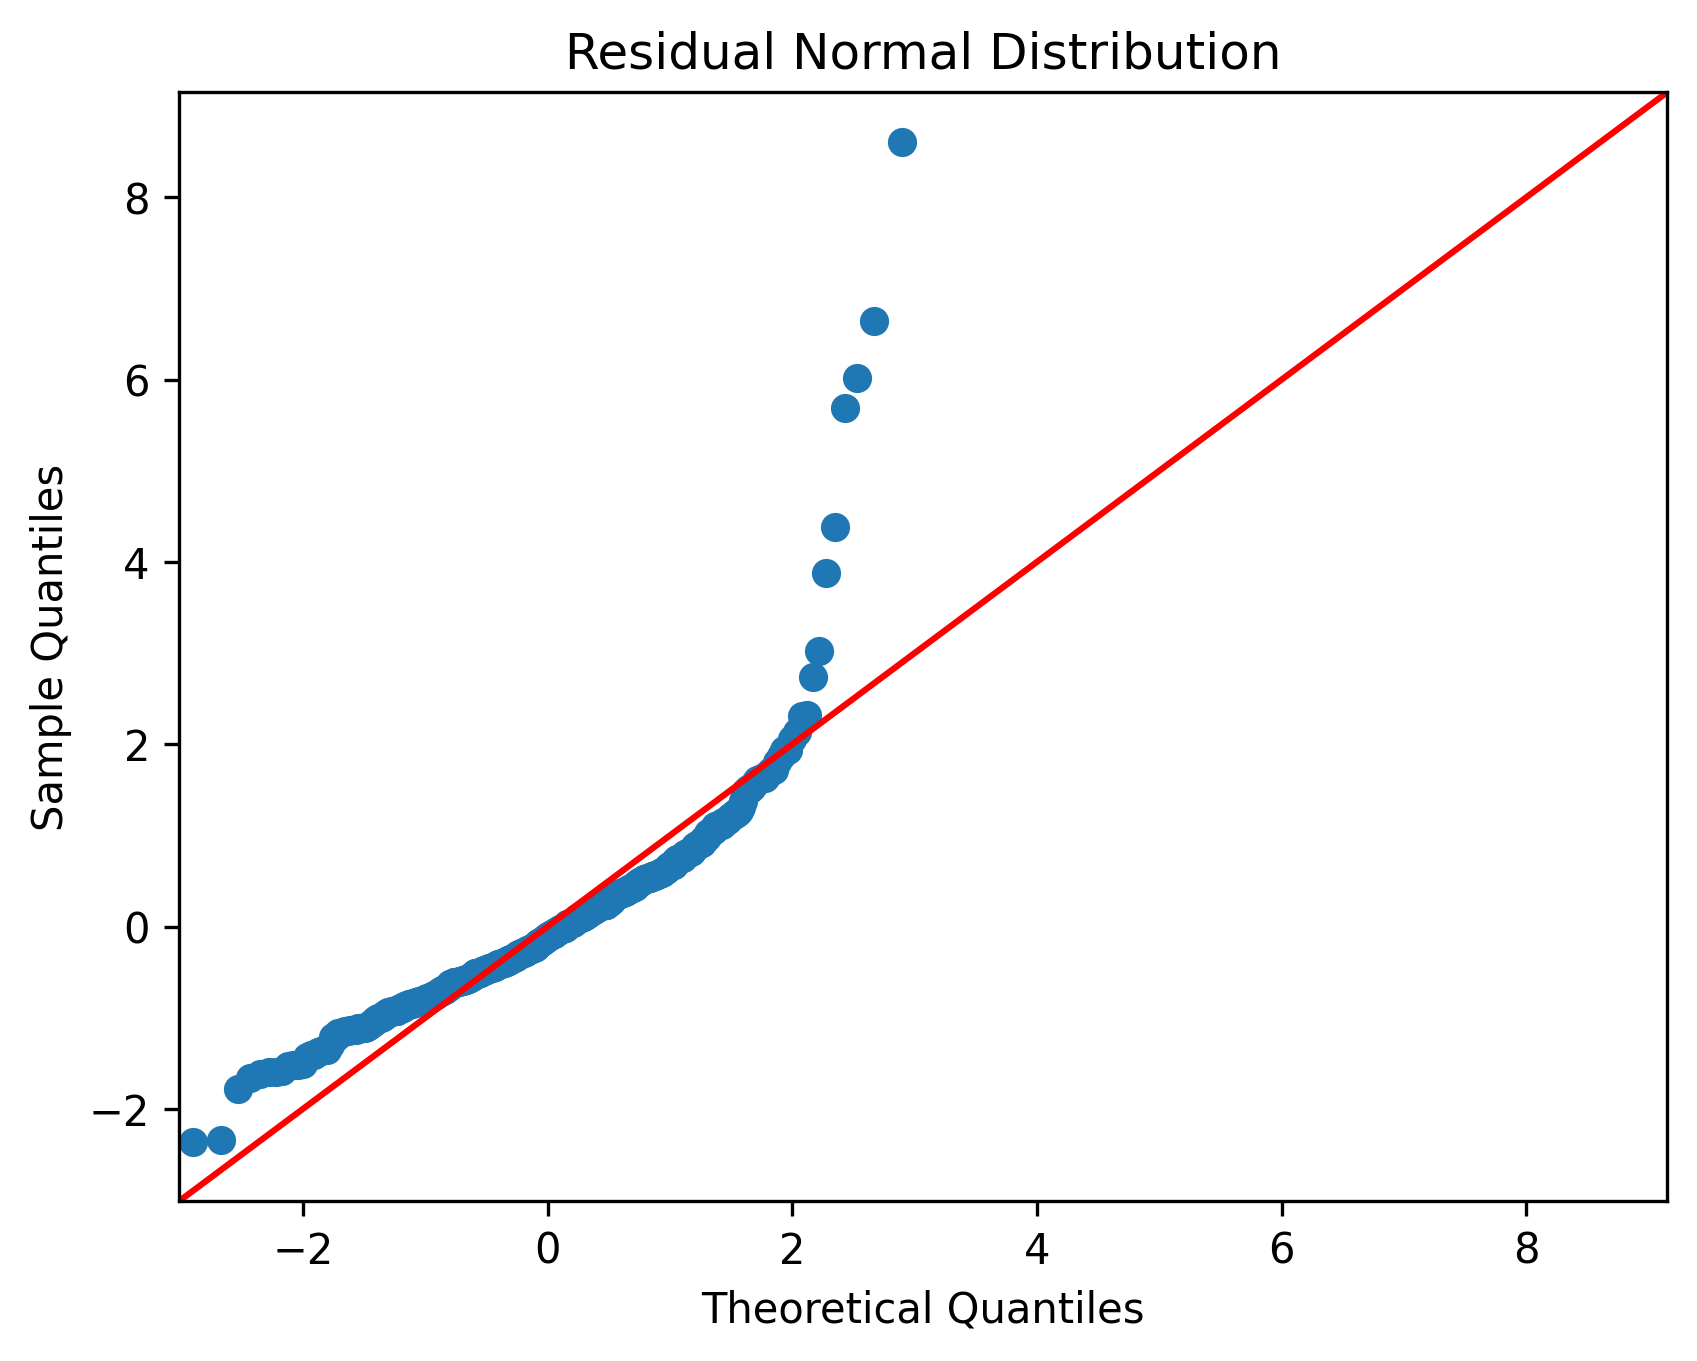

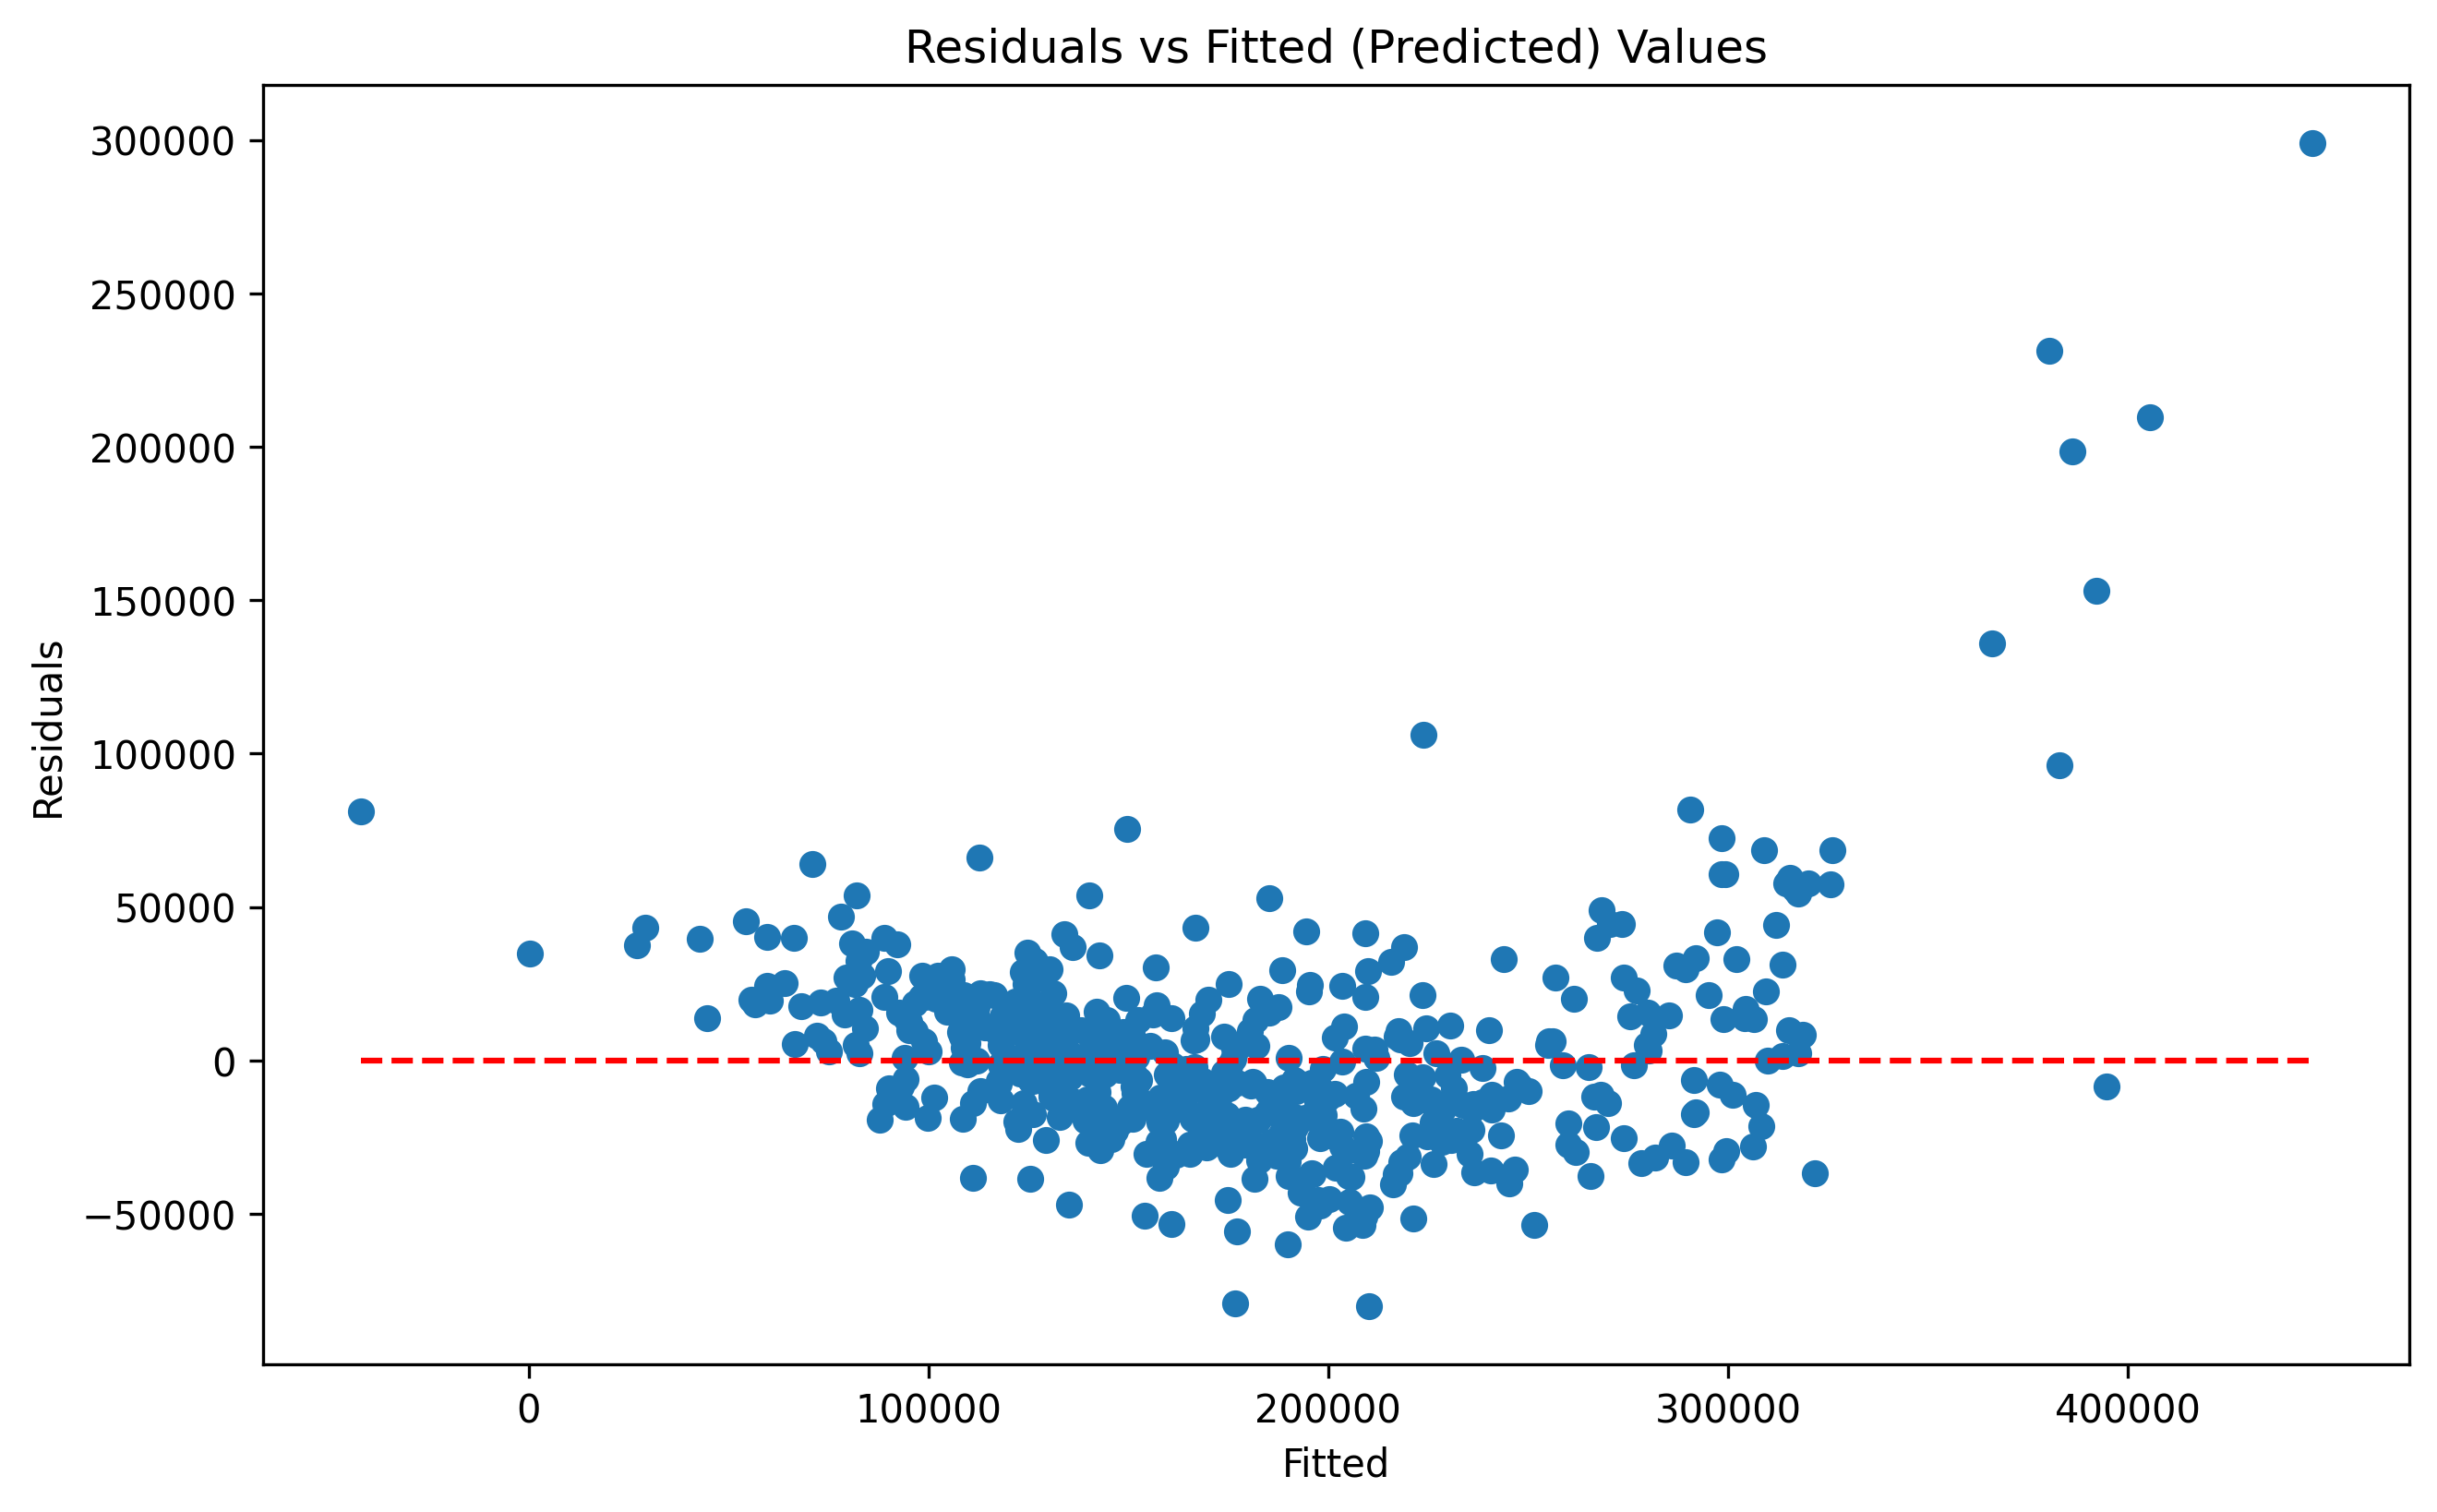

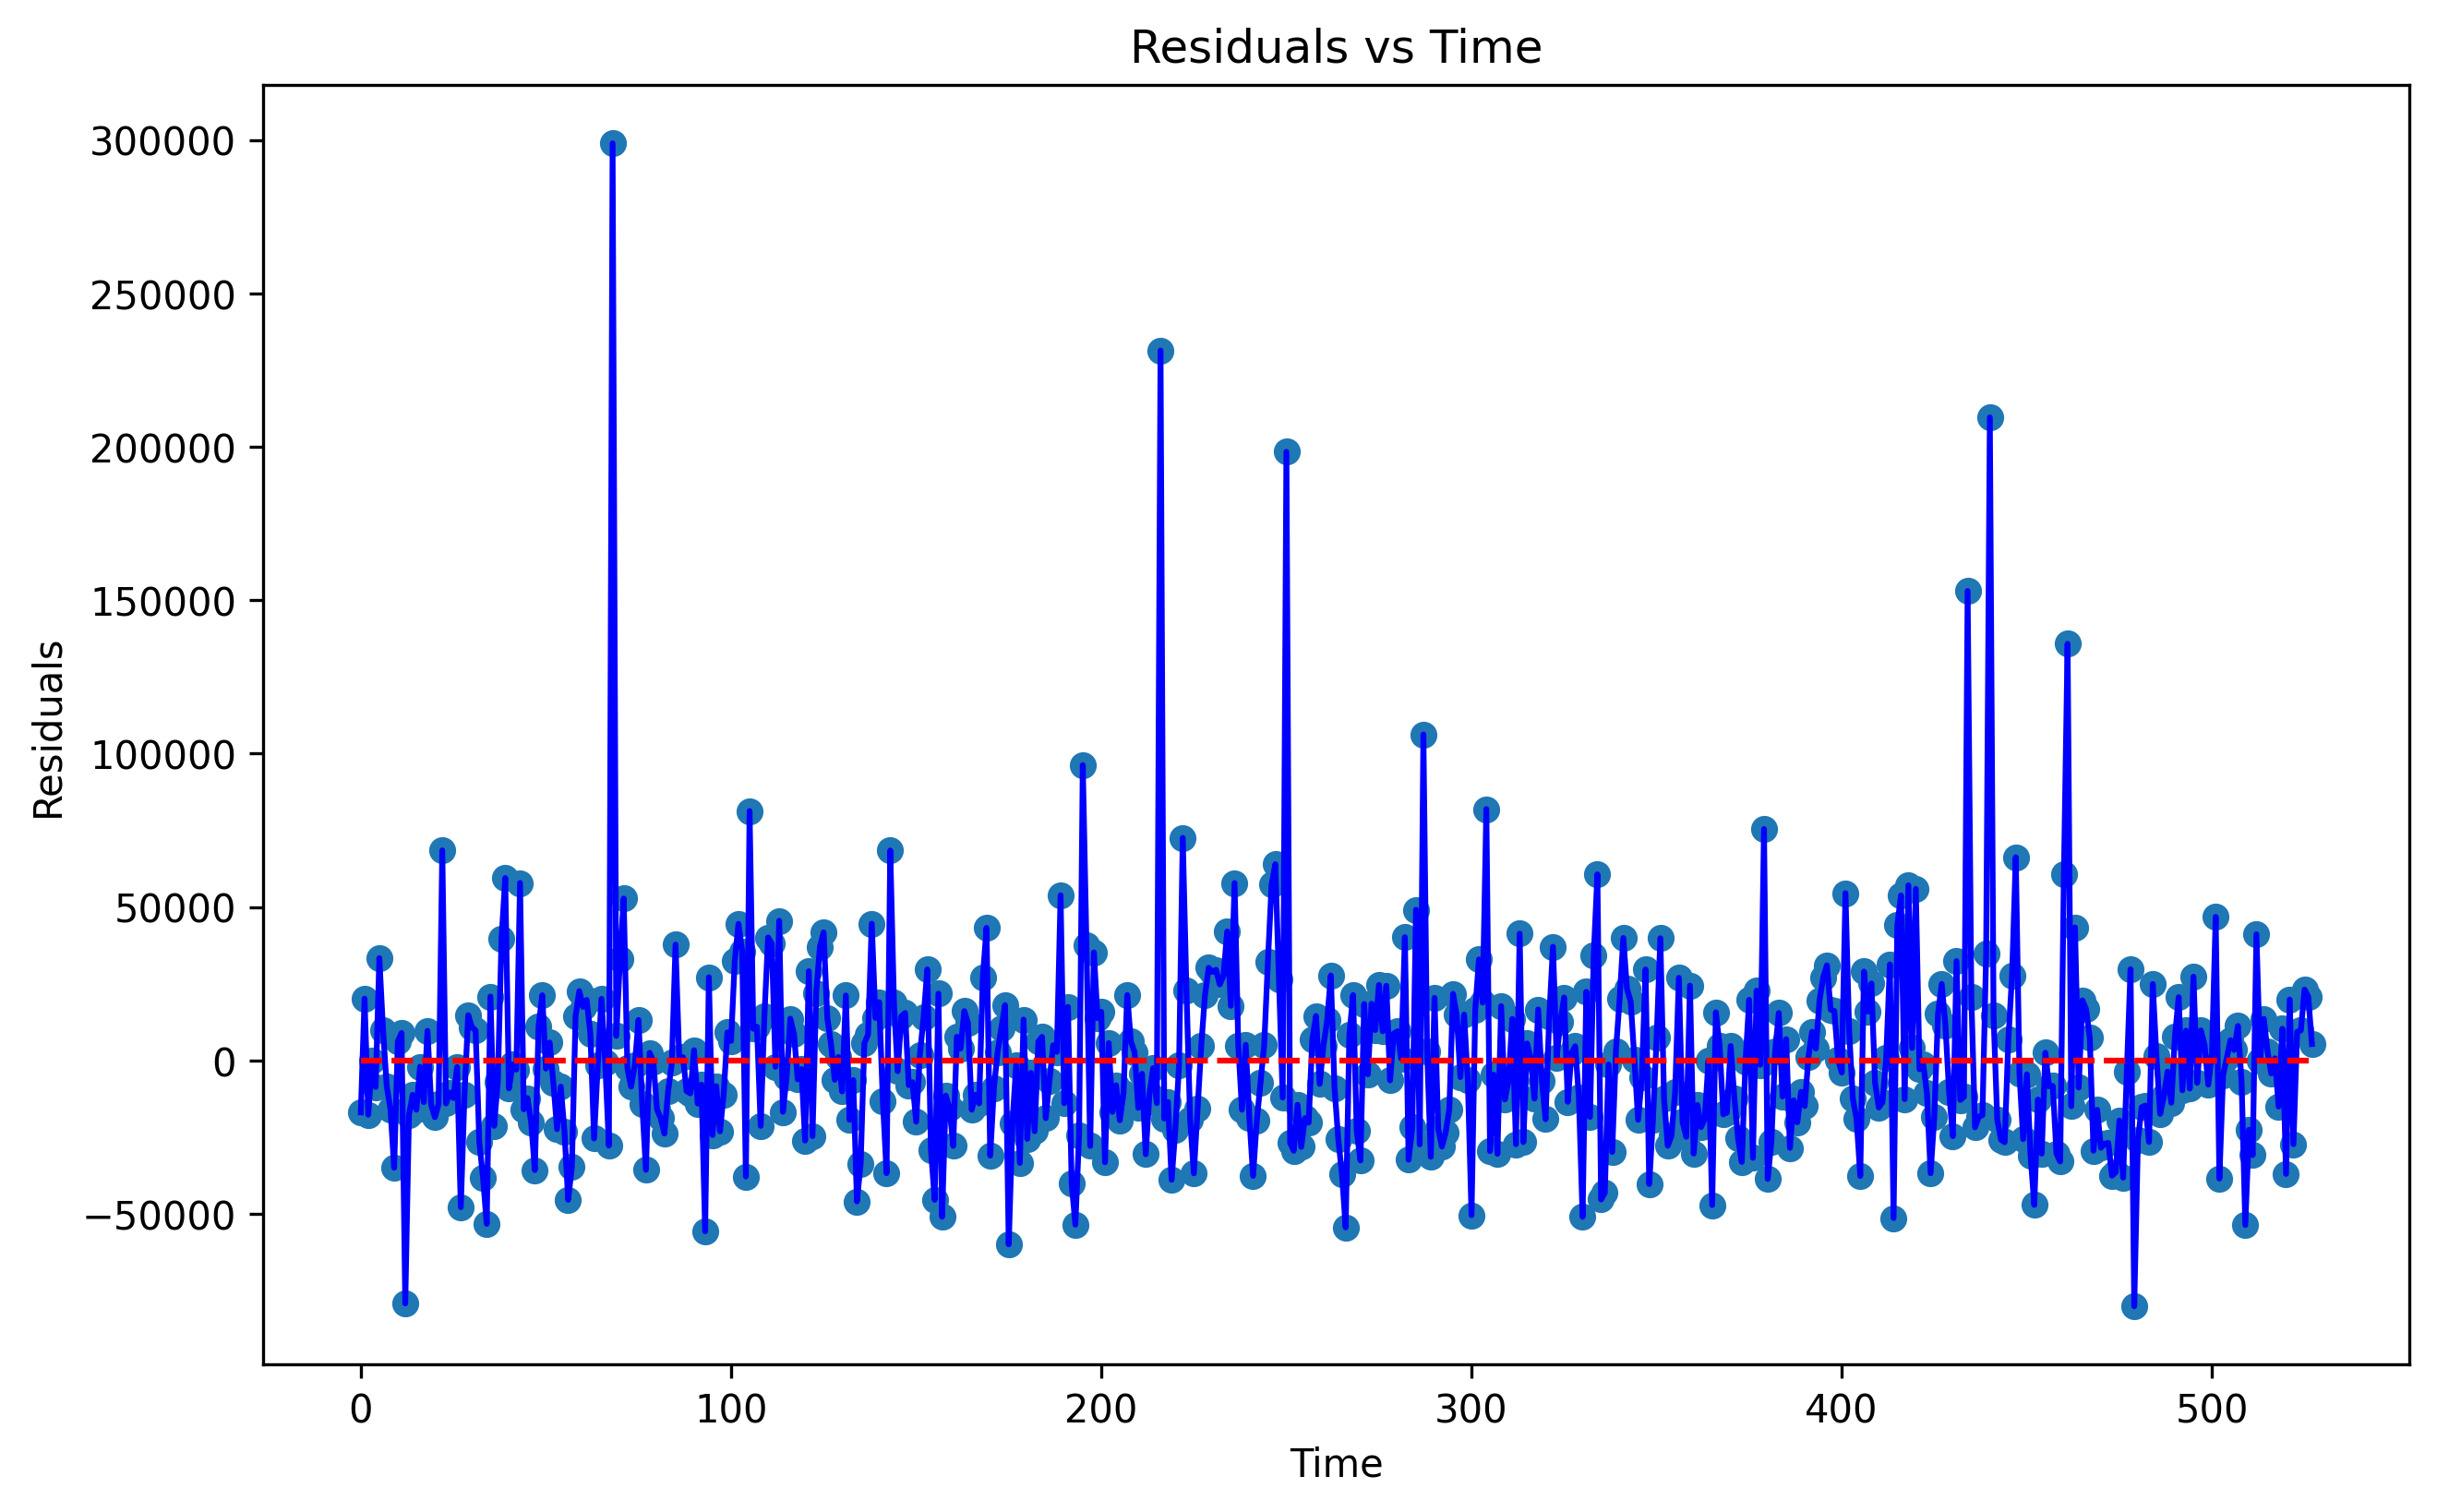

#### Target Distribution vs Log-Transfrom Distribution

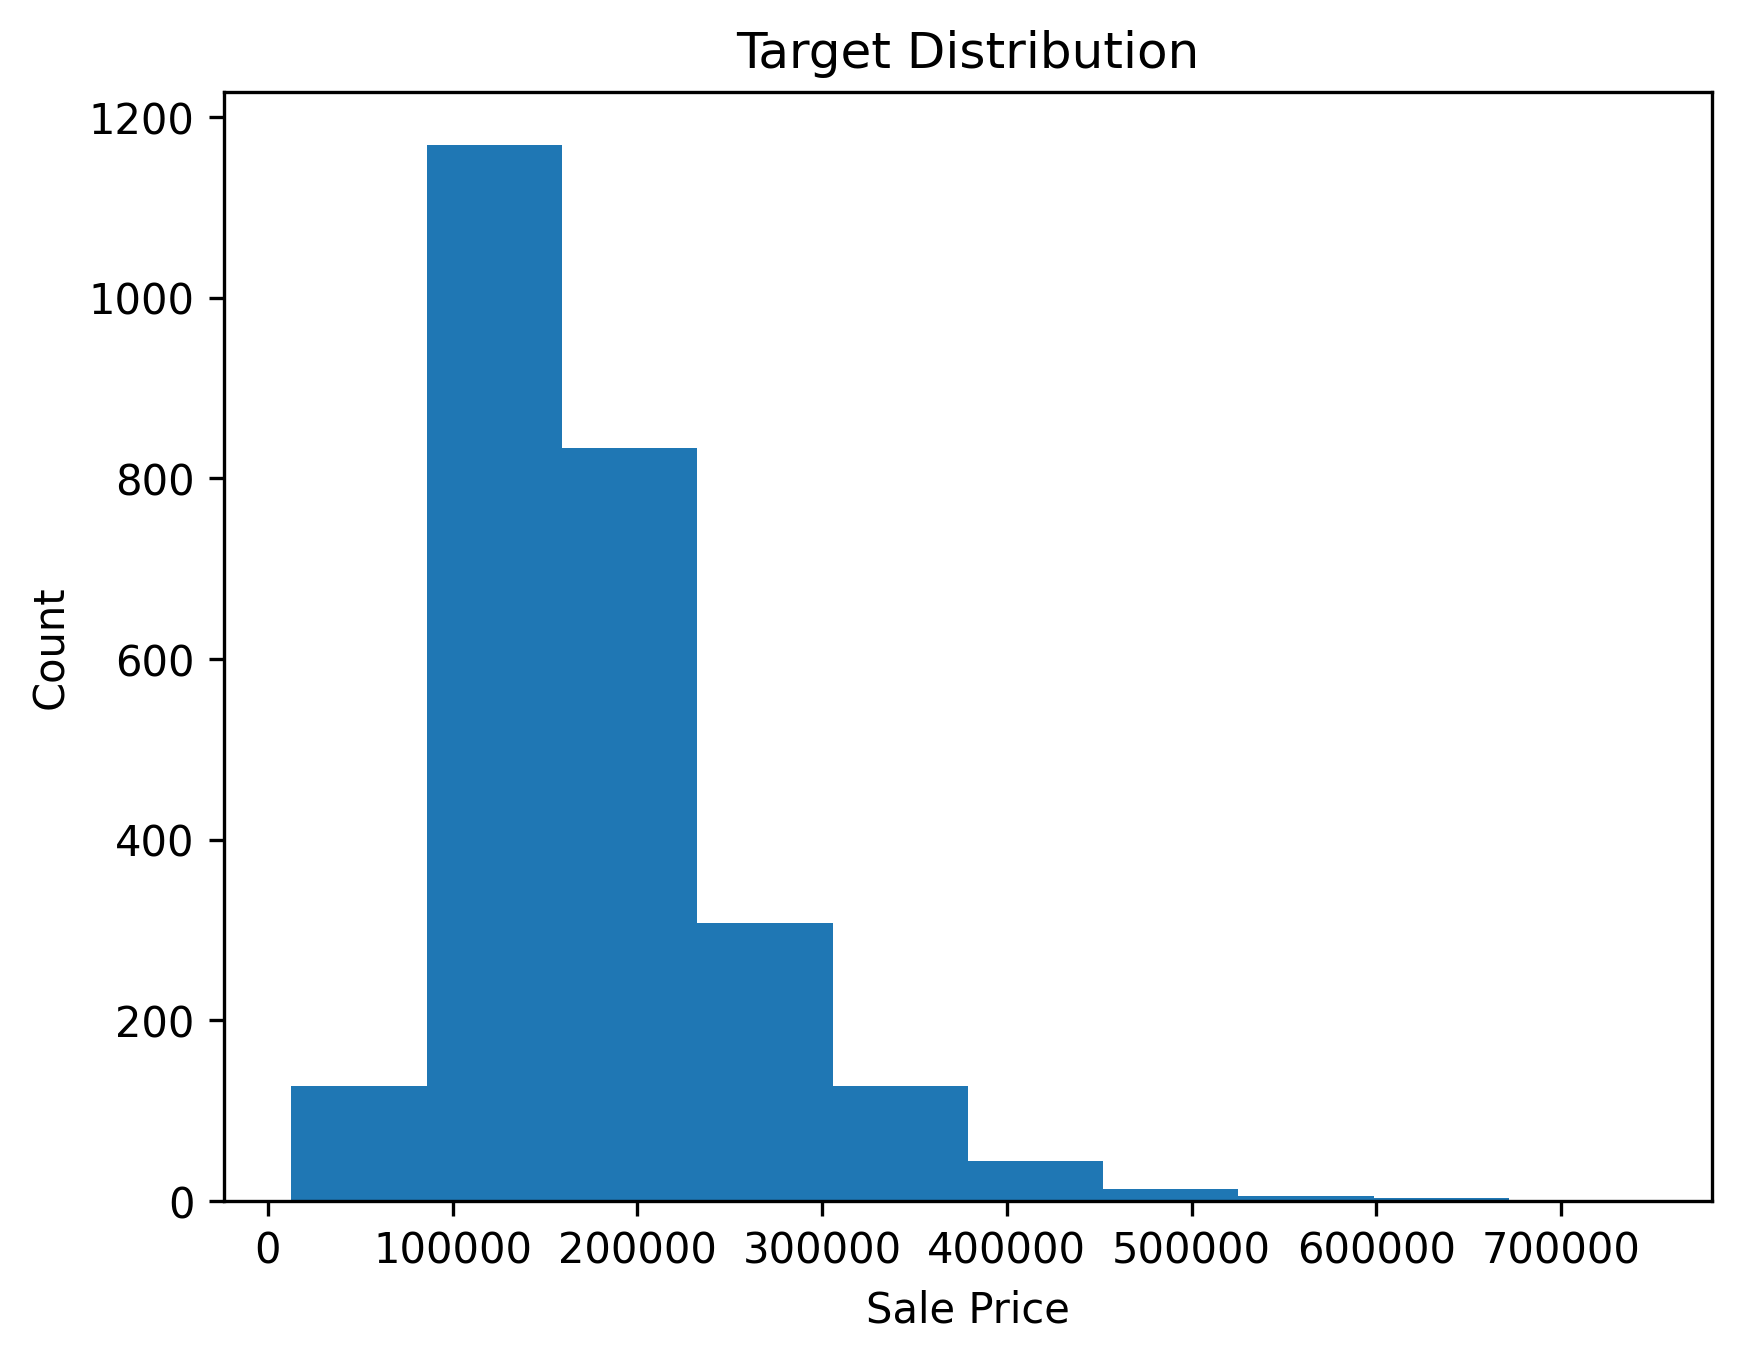

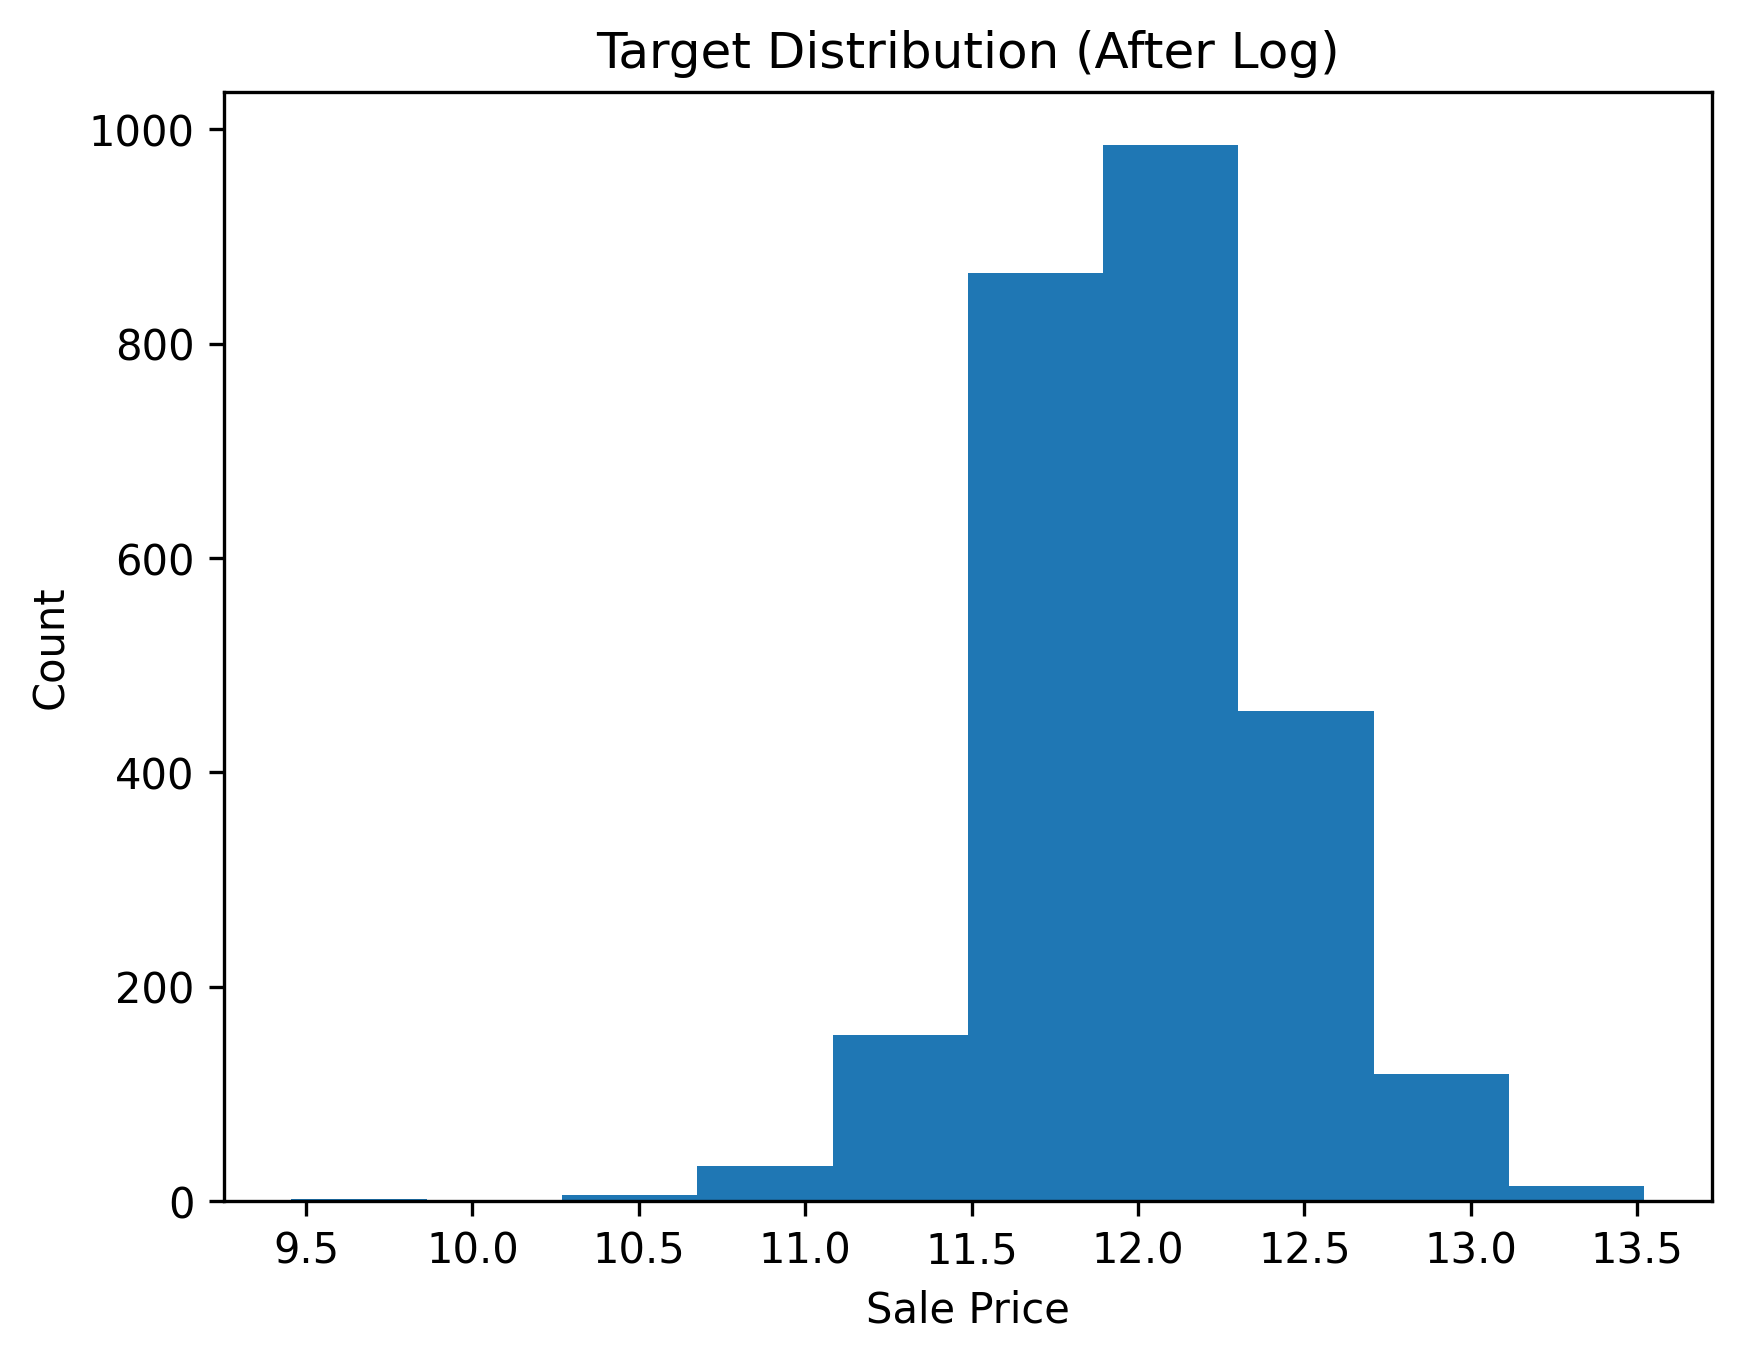

#### After Log-Transform Residuals

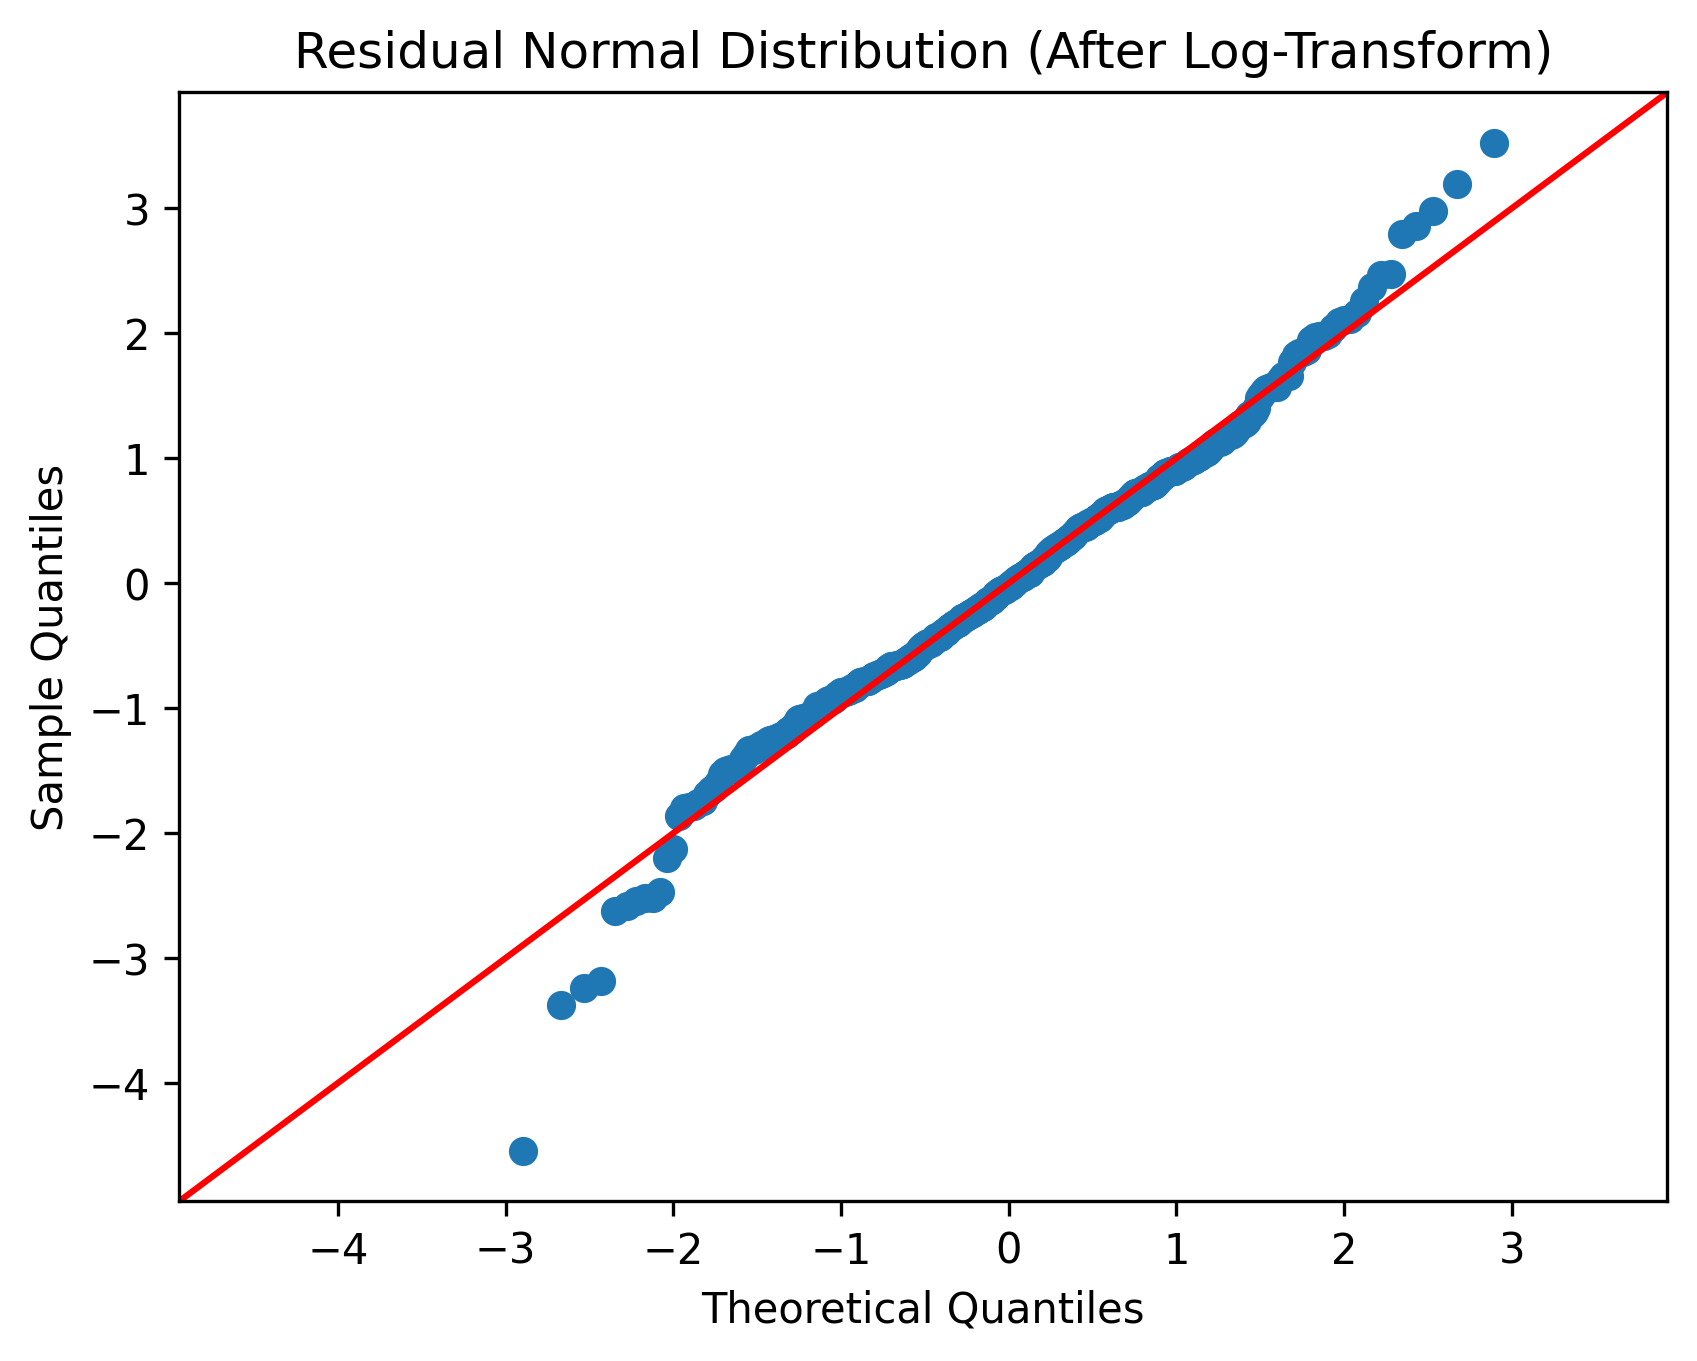

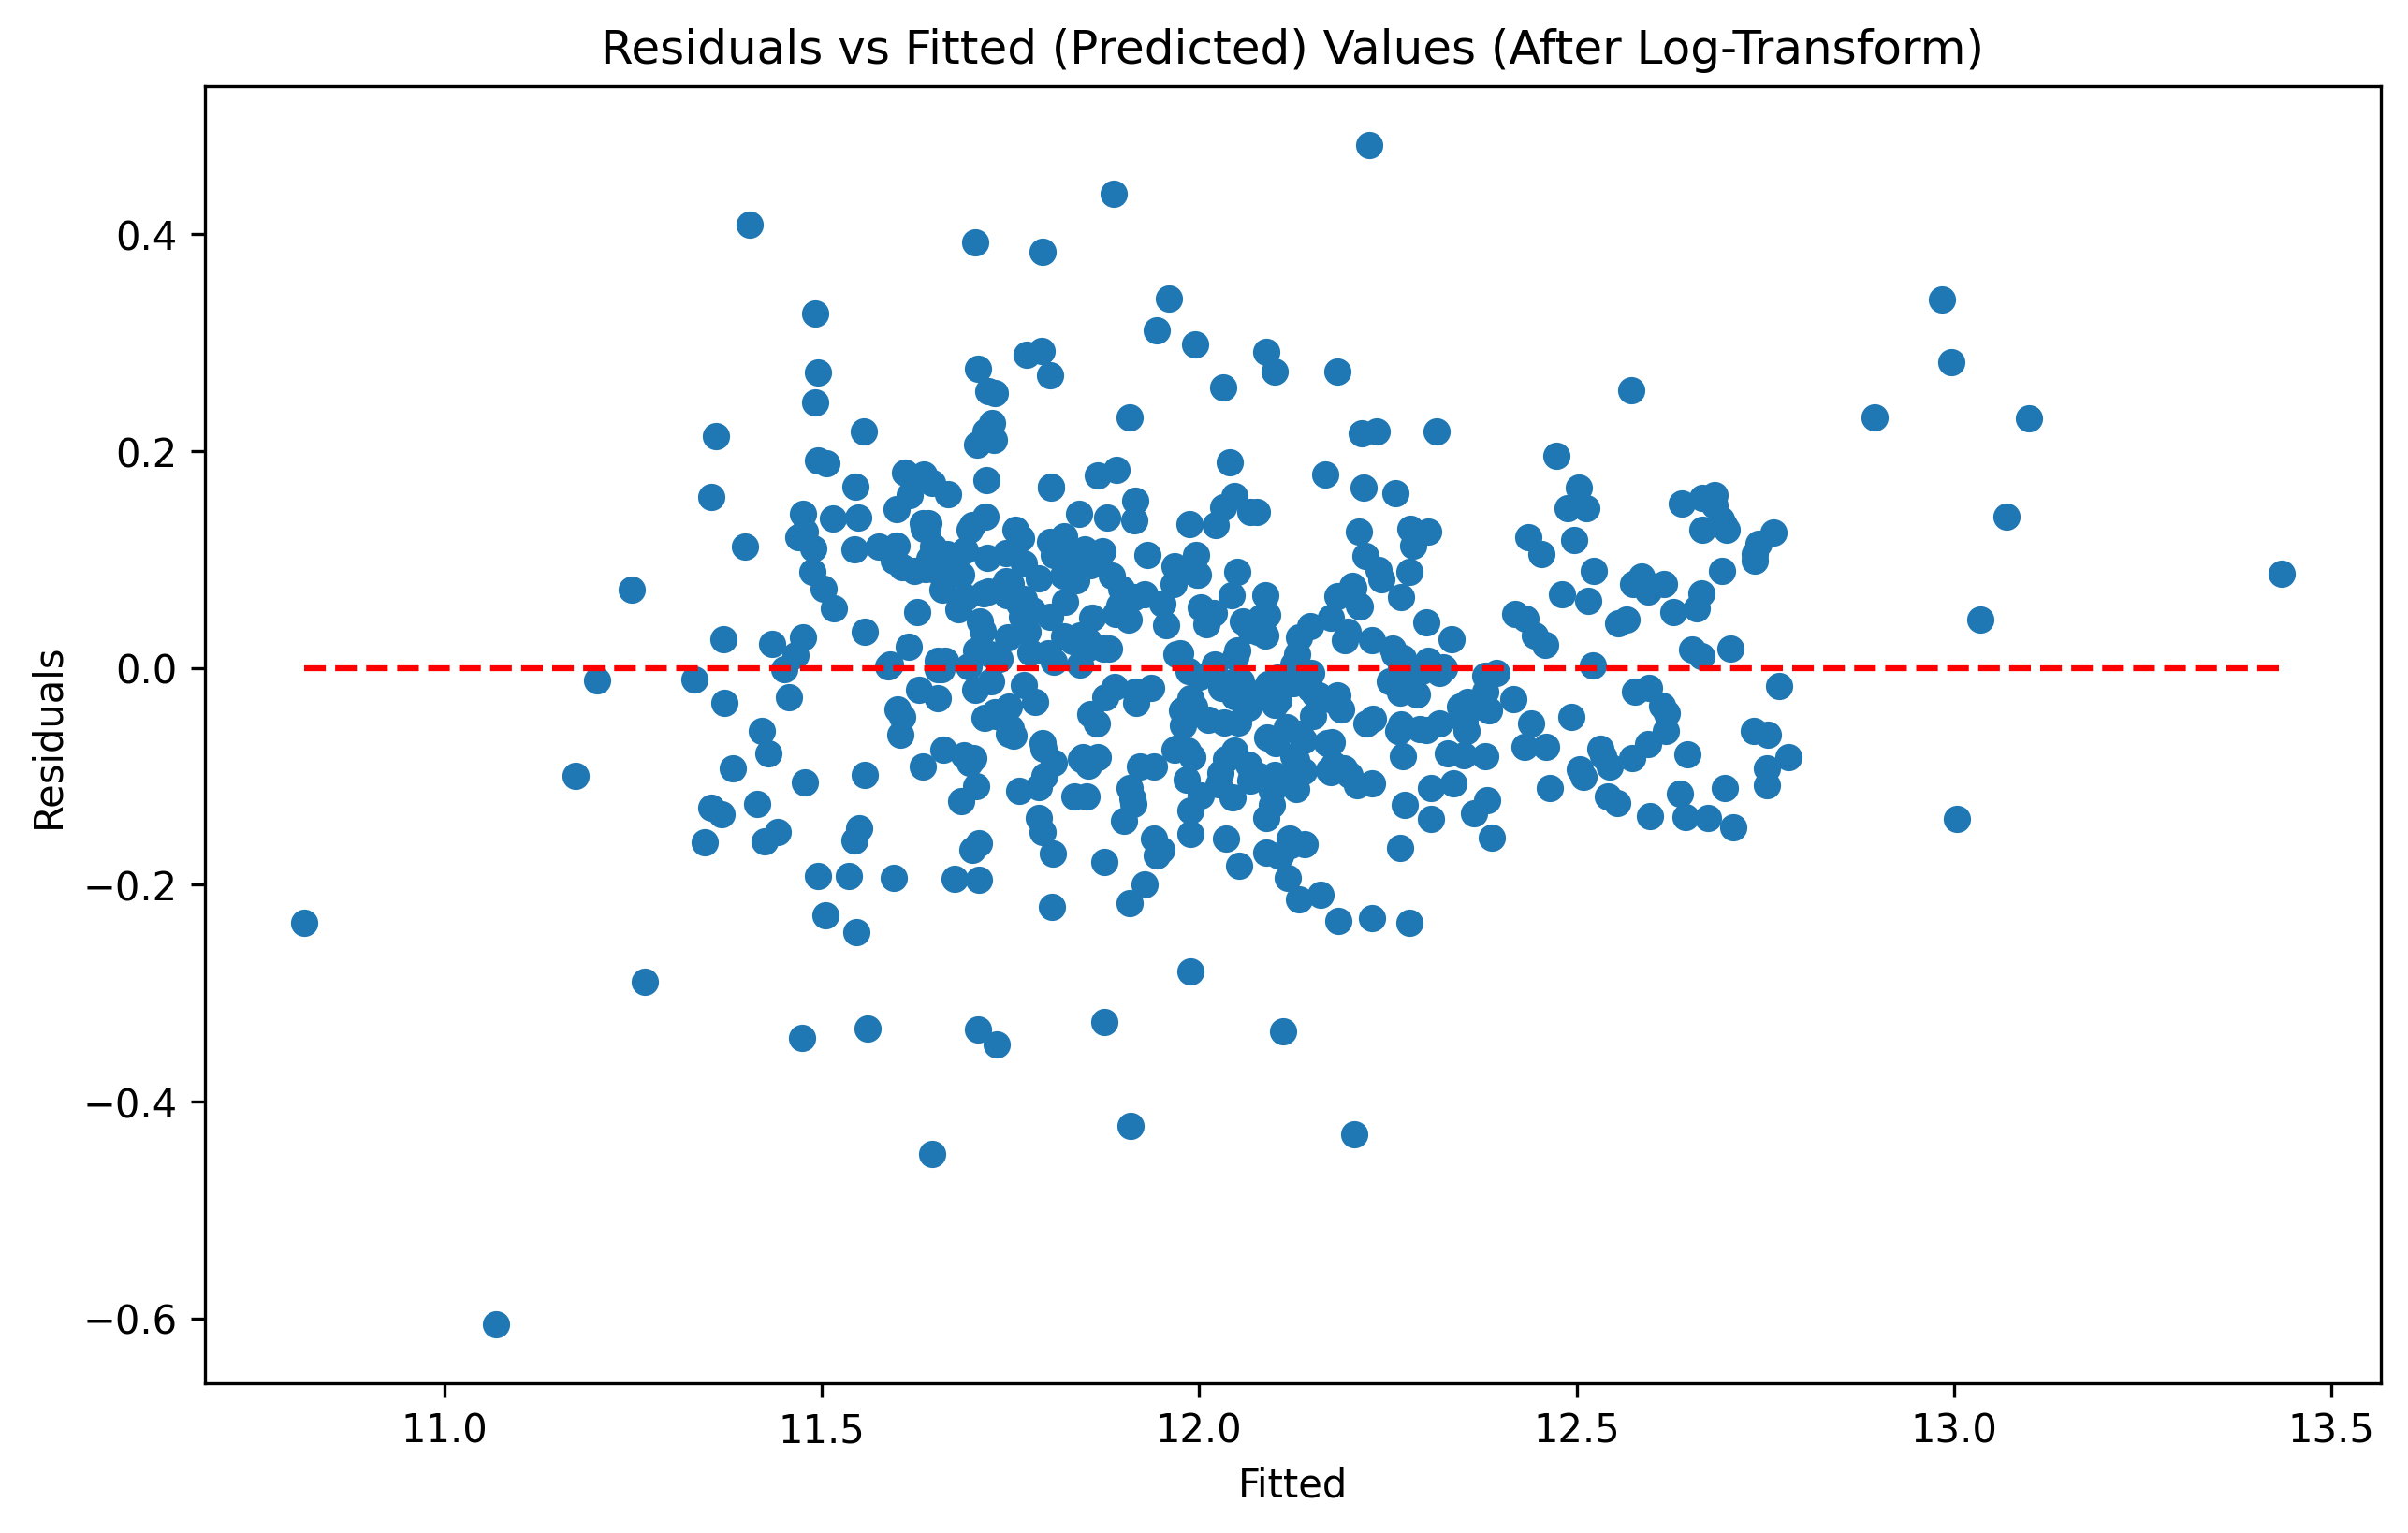

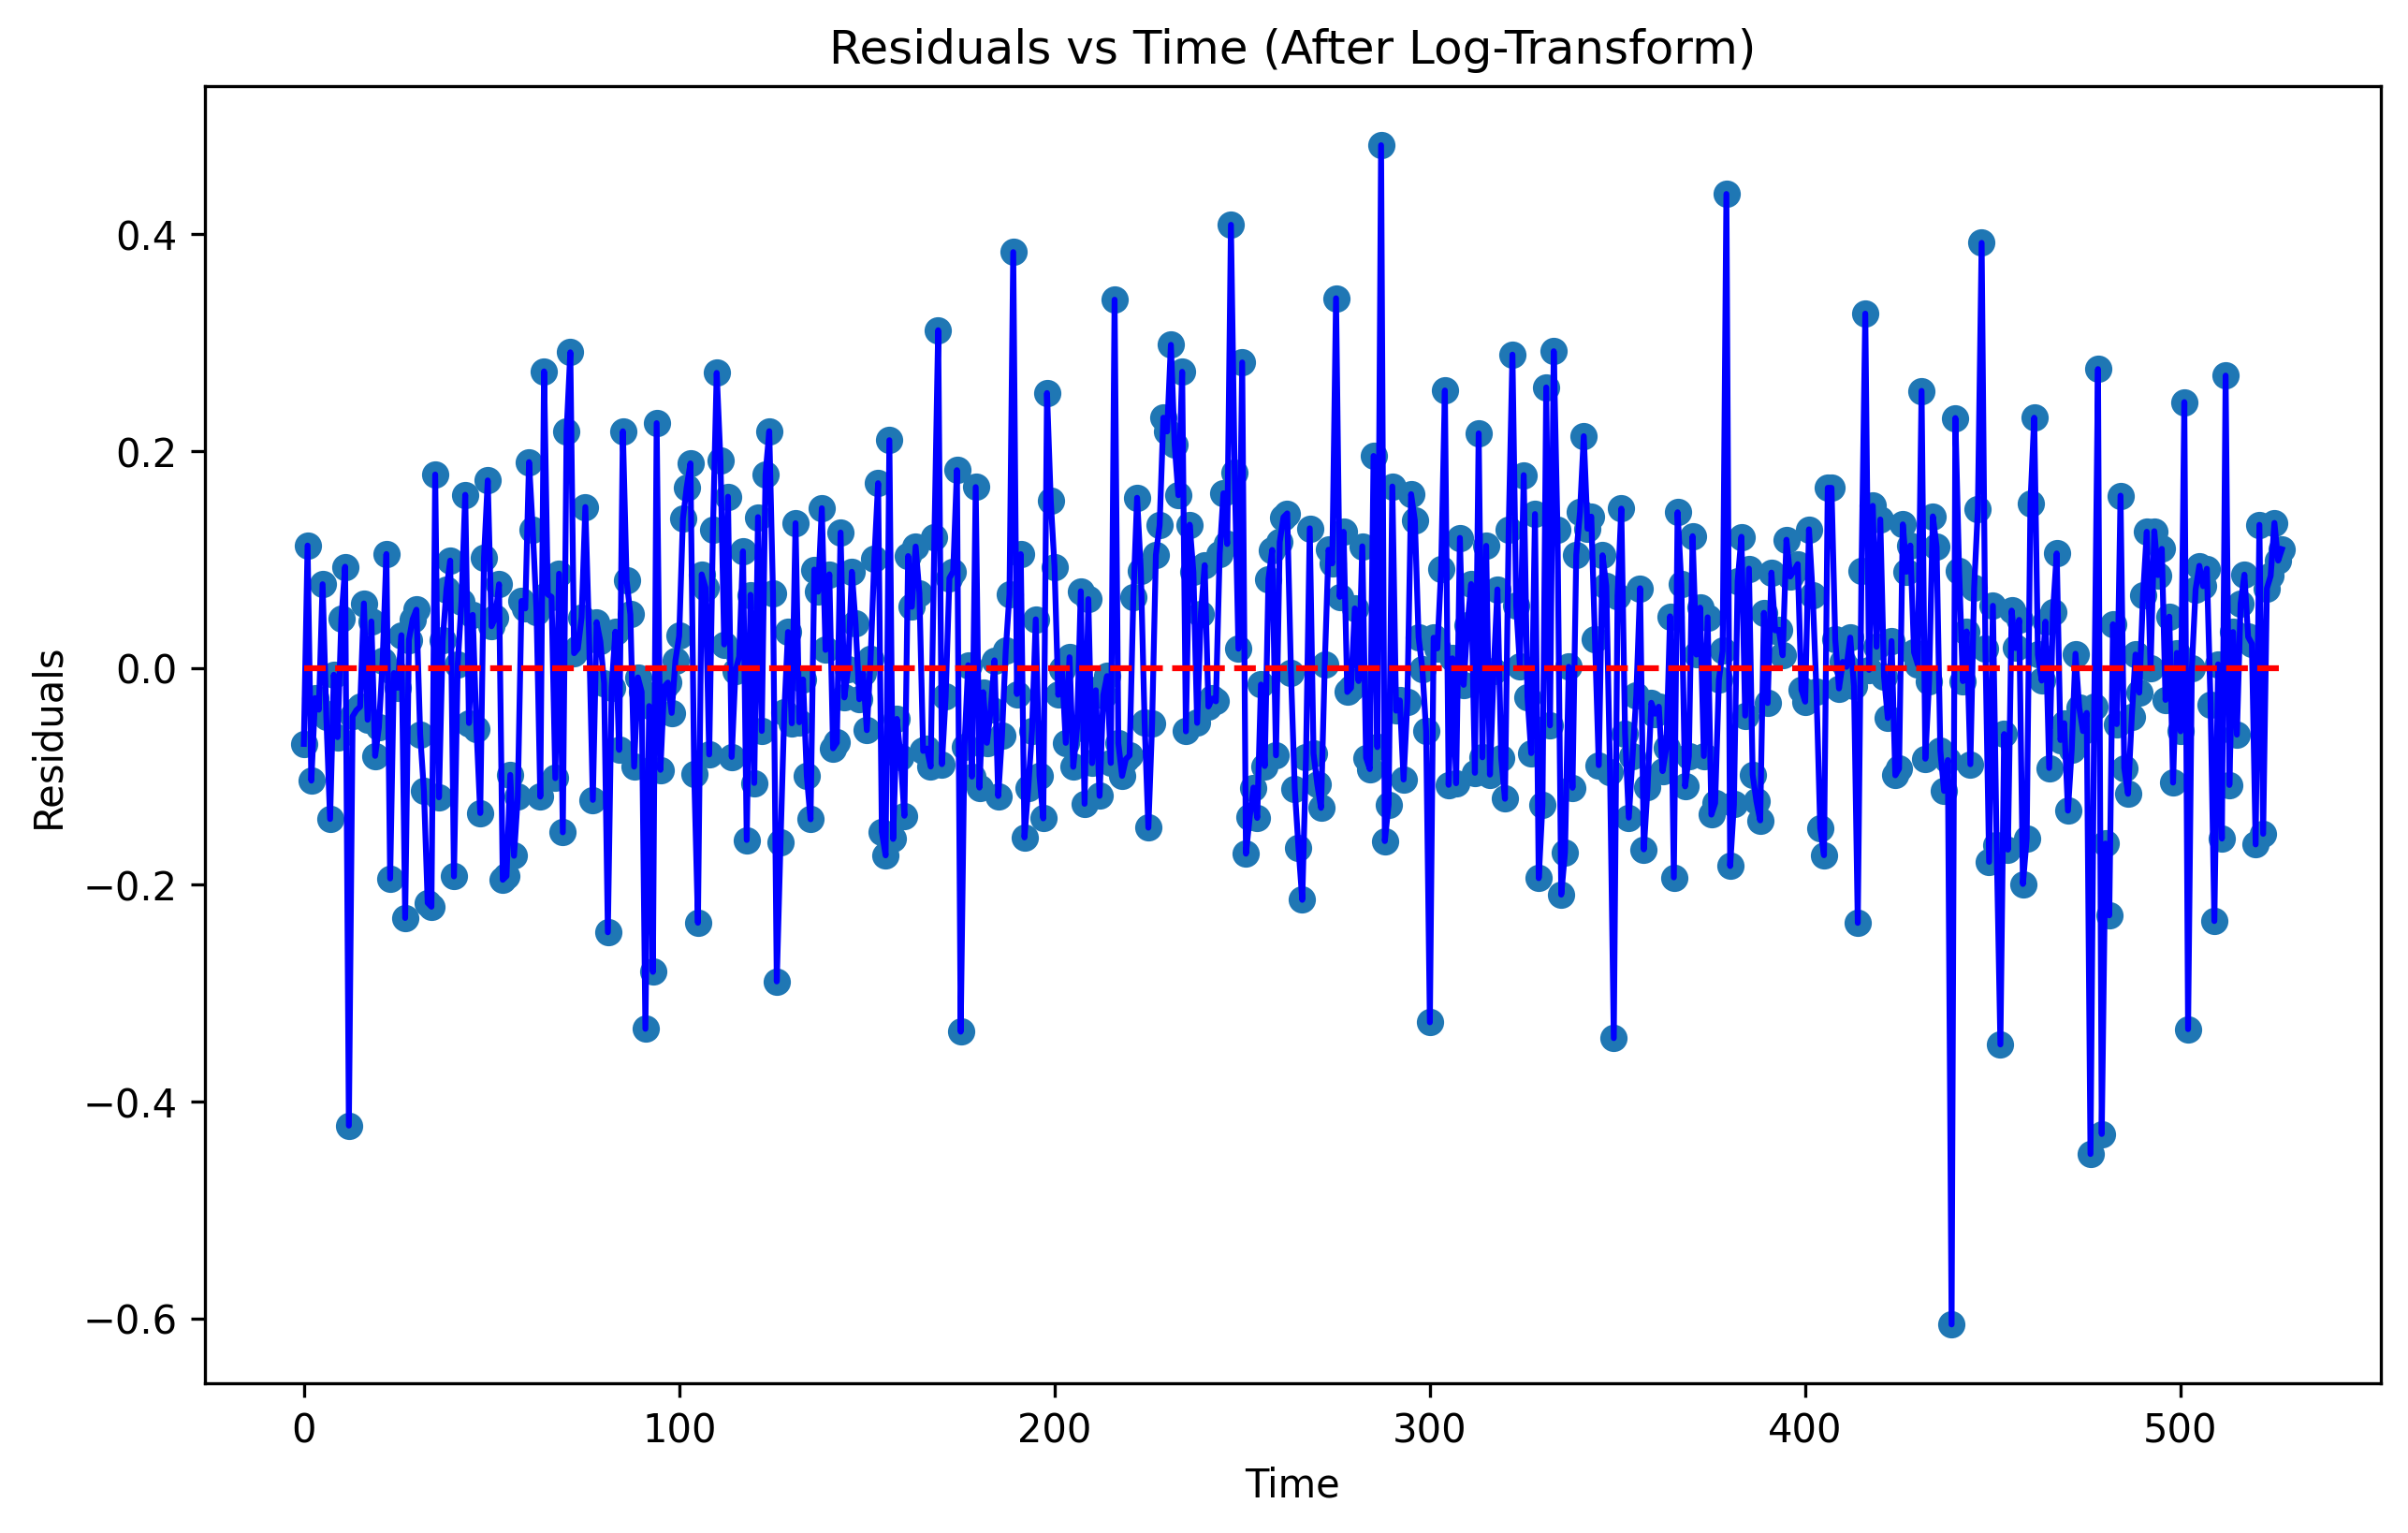

During the first pass of model processing, a standard scaler was applied since there were no significant outliers, and a linear regression model was fitted. The residual analysis showed a fairly normal distribution in the QQ plot, which was acceptable. However, the residuals exhibited a slight U-shaped curve, suggesting missing nonlinearity, and the spread widened for higher-priced homes, indicating heteroscedasticity—both undesirable patterns. On a positive note, the variance of residuals did not change over time.

In the second pass, the target variable was log-transformed before scaling and modeling with linear regression. This adjustment led to notable improvements: the QQ plot showed residuals more closely following a normal distribution, the spread appeared more random with no inherent pattern, and the variance of residuals improved significantly. Finally, cross-validation was performed, yielding much higher and more stable results compared to the earlier single random-state run (random state 42), which likely produced an outlier result and should be investigated further.

Lastly. We implemented lasso regression. There is no significant change in our results but we also picked an arbitrary alpha. Being able to loop through and pick the best one should yield better results over all. At the end of the day, it seems like log transform really brought no improvements as we were seeing a 22-24% with 4 features and 19% with 13. This project needs more work befoe continuing with false metrics!!!
